In [1]:
from fbprophet import Prophet
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [2]:
path = r'datasets/' # use your path
all_files = glob.glob(path + "/20*.csv")
print(all_files)
print(len(all_files))
all_files.reverse()
print(all_files)

['datasets/2021Q1.csv', 'datasets/2018Q4.csv', 'datasets/2021Q2.csv', 'datasets/2018Q3.csv', 'datasets/2018Q2.csv', 'datasets/2018Q1.csv', 'datasets/2020Q2.csv', 'datasets/2020Q3.csv', 'datasets/2020Q1.csv', 'datasets/2019Q4.csv', 'datasets/2020Q4.csv', 'datasets/2019Q1.csv', 'datasets/2019Q3.csv', 'datasets/2019Q2.csv', 'datasets/2013Q4.csv', 'datasets/2015Q2.csv', 'datasets/2015Q3.csv', 'datasets/2017Q1.csv', 'datasets/2017Q3.csv', 'datasets/2015Q1.csv', 'datasets/2017Q2.csv', 'datasets/2011Q4.csv', 'datasets/2013Q2.csv', 'datasets/2015Q4.csv', 'datasets/2011Q1.csv', 'datasets/2013Q3.csv', 'datasets/2013Q1.csv', 'datasets/2011Q3.csv', 'datasets/2017Q4.csv', 'datasets/2011Q2.csv', 'datasets/2014Q1.csv', 'datasets/2016Q3.csv', 'datasets/2010Q4.csv', 'datasets/2016Q2.csv', 'datasets/2014Q2.csv', 'datasets/2012Q4.csv', 'datasets/2016Q1.csv', 'datasets/2014Q3.csv', 'datasets/2010Q3.csv', 'datasets/2012Q1.csv', 'datasets/2010Q2.csv', 'datasets/2016Q4.csv', 'datasets/2014Q4.csv', 'datasets/

In [3]:
df = pd.concat((pd.read_csv(f, index_col=None, header=0) for f in all_files), 
               axis = 0, ignore_index=True)

In [4]:
df

Date      Category1     Category2 Category3     Maker    Sales  \
0       2010-02-15            Air  Conditioners       NaN   Toshino   2143.0   
1       2010-02-15          Water       Heaters       NaN  Furutani    567.0   
2       2010-02-15        Washers             &    Dryers     Akaza   3515.0   
3       2010-02-15  Refrigerators           NaN       NaN     Akaza    687.0   
4       2010-02-15        Washers             &    Dryers   Shimada    435.0   
...            ...            ...           ...       ...       ...      ...   
134959  2021-03-31          Water       Heaters       NaN     Ikeda    317.0   
134960  2021-03-31          Water       Heaters       NaN   Sugiura   1539.0   
134961  2021-03-31  Refrigerators           NaN       NaN     Omuro  31084.0   
134962  2021-03-31            Air  Conditioners       NaN    Funami   4402.0   
134963  2021-03-31           Rice       Cookers       NaN    Funami   9183.0   

        Identifier  
0       RVFWTWSMNU  
1       PF4KB33DVZ  
2       VUQUQMHODG  
3       XVIOZZOUTN  
4       RBRMDIXXGL  
...            ...  
134959  AHSRVKIOLJ  
134960  UPJKNMIDRB  
134961  FUWHINIXUA  
134962  HWQKLKDVSB  
134963  YPD6CTR0JA  

[134964 rows x 7 columns]

In [5]:
df['Date'].dtype

dtype('O')

In [6]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

In [7]:
df['Date'].dtype

dtype('<M8[ns]')

In [8]:
df.describe

<bound method NDFrame.describe of              Date      Category1     Category2 Category3     Maker    Sales  \
0      2010-02-15            Air  Conditioners       NaN   Toshino   2143.0   
1      2010-02-15          Water       Heaters       NaN  Furutani    567.0   
2      2010-02-15        Washers             &    Dryers     Akaza   3515.0   
3      2010-02-15  Refrigerators           NaN       NaN     Akaza    687.0   
4      2010-02-15        Washers             &    Dryers   Shimada    435.0   
...           ...            ...           ...       ...       ...      ...   
134959 2021-03-31          Water       Heaters       NaN     Ikeda    317.0   
134960 2021-03-31          Water       Heaters       NaN   Sugiura   1539.0   
134961 2021-03-31  Refrigerators           NaN       NaN     Omuro  31084.0   
134962 2021-03-31            Air  Conditioners       NaN    Funami   4402.0   
134963 2021-03-31           Rice       Cookers       NaN    Funami   9183.0   

        Identifie

In [9]:
missing_values_count = df.isnull().sum()
missing_values_count[0:7]

Date               0
Category1          0
Category2      41768
Category3     104361
Maker              0
Sales           5376
Identifier         0
dtype: int64

In [10]:
df[['Category2','Category3']] = df[['Category2','Category3']].fillna(value='')

In [11]:
missing_values_count = df.isnull().sum()
missing_values_count[0:7]

Date             0
Category1        0
Category2        0
Category3        0
Maker            0
Sales         5376
Identifier       0
dtype: int64

In [12]:
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.5690406330577042


In [13]:
df.dropna(inplace = True)
df.reset_index(drop=True, inplace=True)

In [14]:
df['Category'] = df['Category1'] + " " + df['Category2'] + " " + df['Category3'] + " " + df['Maker']

In [15]:
df

Date      Category1     Category2 Category3     Maker    Sales  \
0      2010-02-15            Air  Conditioners             Toshino   2143.0   
1      2010-02-15          Water       Heaters            Furutani    567.0   
2      2010-02-15        Washers             &    Dryers     Akaza   3515.0   
3      2010-02-15  Refrigerators                             Akaza    687.0   
4      2010-02-15        Washers             &    Dryers   Shimada    435.0   
...           ...            ...           ...       ...       ...      ...   
129583 2021-03-31          Water       Heaters               Ikeda    317.0   
129584 2021-03-31          Water       Heaters             Sugiura   1539.0   
129585 2021-03-31  Refrigerators                             Omuro  31084.0   
129586 2021-03-31            Air  Conditioners              Funami   4402.0   
129587 2021-03-31           Rice       Cookers              Funami   9183.0   

        Identifier                   Category  
0       RVFWTWSMNU  Air Conditioners  Toshino  
1       PF4KB33DVZ    Water Heaters  Furutani  
2       VUQUQMHODG     Washers & Dryers Akaza  
3       XVIOZZOUTN      Refrigerators   Akaza  
4       RBRMDIXXGL   Washers & Dryers Shimada  
...            ...                        ...  
129583  AHSRVKIOLJ       Water Heaters  Ikeda  
129584  UPJKNMIDRB     Water Heaters  Sugiura  
129585  FUWHINIXUA      Refrigerators   Omuro  
129586  HWQKLKDVSB   Air Conditioners  Funami  
129587  YPD6CTR0JA       Rice Cookers  Funami  

[129588 rows x 8 columns]

In [16]:
df.drop(['Category1', 'Category2','Category3'], axis = 1, inplace = True)

In [17]:
df

Date     Maker    Sales  Identifier                   Category
0      2010-02-15   Toshino   2143.0  RVFWTWSMNU  Air Conditioners  Toshino
1      2010-02-15  Furutani    567.0  PF4KB33DVZ    Water Heaters  Furutani
2      2010-02-15     Akaza   3515.0  VUQUQMHODG     Washers & Dryers Akaza
3      2010-02-15     Akaza    687.0  XVIOZZOUTN      Refrigerators   Akaza
4      2010-02-15   Shimada    435.0  RBRMDIXXGL   Washers & Dryers Shimada
...           ...       ...      ...         ...                        ...
129583 2021-03-31     Ikeda    317.0  AHSRVKIOLJ       Water Heaters  Ikeda
129584 2021-03-31   Sugiura   1539.0  UPJKNMIDRB     Water Heaters  Sugiura
129585 2021-03-31     Omuro  31084.0  FUWHINIXUA      Refrigerators   Omuro
129586 2021-03-31    Funami   4402.0  HWQKLKDVSB   Air Conditioners  Funami
129587 2021-03-31    Funami   9183.0  YPD6CTR0JA       Rice Cookers  Funami

[129588 rows x 5 columns]

In [18]:
sister_df = pd.DataFrame(columns = list(df))

In [19]:
# Separate identifiers with numbers in them from those with no numbers in them
num_list = []
for index, row in df.iterrows():
    if any(map(str.isdigit,row['Identifier'])):
        #If the identifier has a number, then append to num_list
        num_list.append(index)

In [20]:
#PT. D.K. Works will have its own data frame, namely sister_df
sister_df = sister_df.append(df.iloc[num_list], ignore_index=True)
df.drop(df.index[num_list], inplace=True, axis = 0)
df.reset_index(drop=True, inplace=True)

In [21]:
#Check sanity
sister_df

Date      Maker   Sales  Identifier                    Category
0     2010-02-15   Furutani   567.0  PF4KB33DVZ     Water Heaters  Furutani
1     2010-02-15    Okamoto   475.0  FUFHZH9WRW    Washers & Dryers Okamoto
2     2010-02-15     Kikuma  1301.0  QFY2WV5LUE     Washers & Dryers Kikuma
3     2010-02-15  Hayashida   132.0  AHJK2FTTBH  Washers & Dryers Hayashida
4     2010-02-15  Yoshikawa  4585.0  UG2IU3EFWI   Refrigerators   Yoshikawa
...          ...        ...     ...         ...                         ...
40085 2021-03-31  Hayashida  1870.0  AHJK2FTTBH  Washers & Dryers Hayashida
40086 2021-03-31  Yoshikawa  1710.0  TLSY3MWMK8      Water Pumps  Yoshikawa
40087 2021-03-31      Akaza  2614.0  KSNN8R2CCO         Rice Cookers  Akaza
40088 2021-03-31    Okamoto   883.0  FUFHZH9WRW    Washers & Dryers Okamoto
40089 2021-03-31     Funami  9183.0  YPD6CTR0JA        Rice Cookers  Funami

[40090 rows x 5 columns]

In [22]:
#Check sanity
df

Date      Maker    Sales  Identifier                   Category
0     2010-02-15    Toshino   2143.0  RVFWTWSMNU  Air Conditioners  Toshino
1     2010-02-15      Akaza   3515.0  VUQUQMHODG     Washers & Dryers Akaza
2     2010-02-15      Akaza    687.0  XVIOZZOUTN      Refrigerators   Akaza
3     2010-02-15    Shimada    435.0  RBRMDIXXGL   Washers & Dryers Shimada
4     2010-02-15     Funami    726.0   BIBIOOIHA     Refrigerators   Funami
...          ...        ...      ...         ...                        ...
89493 2021-03-31  Matsumoto    602.0  UPHDCCFDRL    Dishwashers   Matsumoto
89494 2021-03-31      Ikeda    317.0  AHSRVKIOLJ       Water Heaters  Ikeda
89495 2021-03-31    Sugiura   1539.0  UPJKNMIDRB     Water Heaters  Sugiura
89496 2021-03-31      Omuro  31084.0  FUWHINIXUA      Refrigerators   Omuro
89497 2021-03-31     Funami   4402.0  HWQKLKDVSB   Air Conditioners  Funami

[89498 rows x 5 columns]

In [23]:
#Check sanity
len(df) + len(sister_df)

129588

In [24]:
sister_df['Category'].unique()

array(['Water Heaters  Furutani', 'Washers & Dryers Okamoto',
       'Washers & Dryers Kikuma', 'Washers & Dryers Hayashida',
       'Refrigerators   Yoshikawa', 'Air Conditioners  Akaza',
       'Vacuum Cleaners  Toshino', 'Refrigerators   Shimada',
       'Rice Cookers  Akaza', 'Rice Cookers  Funami',
       'Ovens & Cooktops Akaza', 'Water Pumps  Yoshikawa',
       'Dishwashers   Sugiura', 'Refrigerators   Hisami',
       'Water Pumps  Ikeda', 'Dishwashers   Ikeda'], dtype=object)

In [25]:
len(sister_df['Category'].unique())

16

In [26]:
# Each Category count in PT. D.K. Works
sister_df.groupby('Category').Category.count()

Category
Air Conditioners  Akaza       2681
Dishwashers   Ikeda            862
Dishwashers   Sugiura         2660
Ovens & Cooktops Akaza        2658
Refrigerators   Hisami        2672
Refrigerators   Shimada       2676
Refrigerators   Yoshikawa     2687
Rice Cookers  Akaza           2657
Rice Cookers  Funami          2665
Vacuum Cleaners  Toshino      2671
Washers & Dryers Hayashida    2666
Washers & Dryers Kikuma       2661
Washers & Dryers Okamoto      2667
Water Heaters  Furutani       2676
Water Pumps  Ikeda            1864
Water Pumps  Yoshikawa        2667
Name: Category, dtype: int64

In [27]:
df['Category'].unique()

array(['Air Conditioners  Toshino', 'Washers & Dryers Akaza',
       'Refrigerators   Akaza', 'Washers & Dryers Shimada',
       'Refrigerators   Funami', 'Refrigerators   Omuro',
       'Vacuum Cleaners  Funami', 'Vacuum Cleaners  Hisami',
       'Vacuum Cleaners  Akaza', 'Air Conditioners  Funami',
       'Vacuum Cleaners  Hayashida', 'Televisions   Shimada',
       'Air Conditioners  Yoshikawa', 'Televisions   Okamoto',
       'Water Heaters  Sugiura', 'Rice Cookers  Ikeda',
       'Ovens & Cooktops Toshino', 'Rice Cookers  Furutani',
       'Ovens & Cooktops Sugiura', 'Ovens & Cooktops Shimada',
       'Ovens & Cooktops Ikeda', 'Dishwashers   Nanase',
       'Dishwashers   Katayama', 'Refrigerators   Nanase',
       'Water Pumps  Furutani', 'Water Pumps  Funami',
       'Rice Cookers  Toshino', 'Televisions   Katayama',
       'Rice Cookers  Matsumoto', 'Ovens & Cooktops Omuro',
       'Dishwashers   Matsumoto', 'Water Heaters  Ikeda',
       'Televisions   Kikuma', 'Water Heaters 

In [28]:
len(df['Date'].unique())

2783

In [29]:
len(df['Category'].unique())

36

<AxesSubplot:title={'center':'All Category Sales'}, xlabel='Date', ylabel='Sales'>

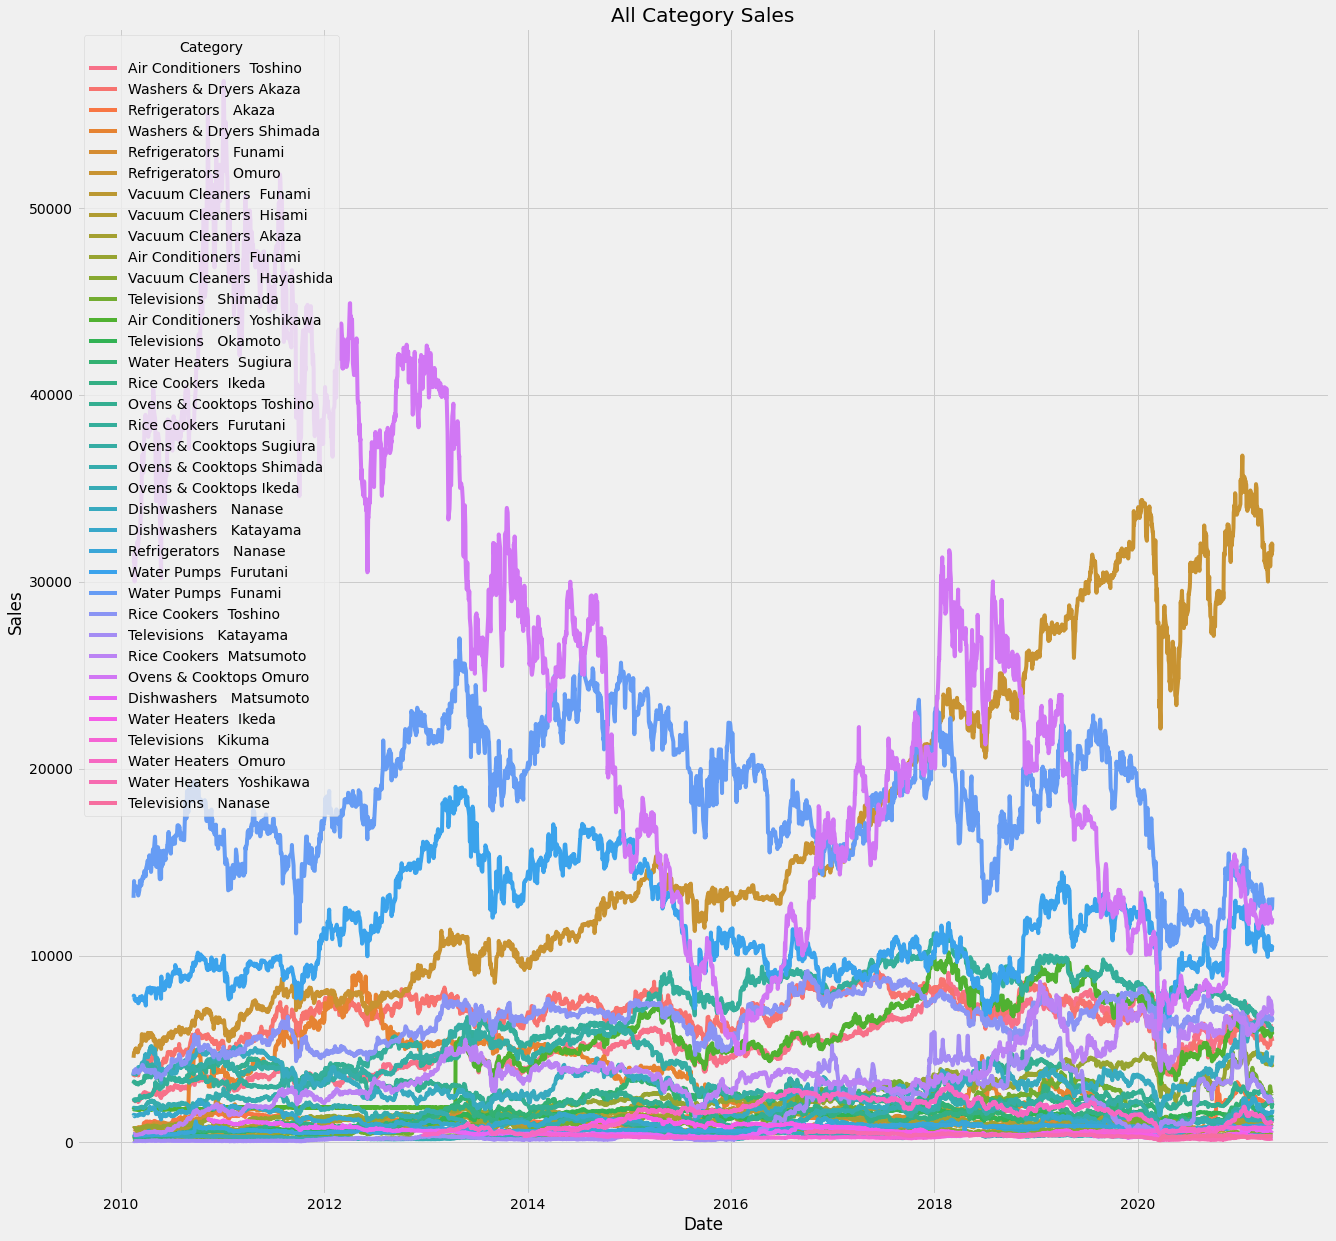

In [30]:
# Set the width and height of the figure
plt.figure(figsize=(20,20))

# Add title
plt.title("All Category Sales")

# Line chart showing Sales over Date mapped by Category
sns.lineplot(x='Date',y='Sales',hue='Category', data=df)

In [31]:
# Each Category count in PT. Denki Kobo
df.groupby('Category').Category.count()

Category
Air Conditioners  Funami       2677
Air Conditioners  Toshino      2648
Air Conditioners  Yoshikawa    2656
Dishwashers   Katayama         2674
Dishwashers   Matsumoto        2507
Dishwashers   Nanase           2688
Ovens & Cooktops Ikeda         2682
Ovens & Cooktops Omuro         2664
Ovens & Cooktops Shimada       2647
Ovens & Cooktops Sugiura       2672
Ovens & Cooktops Toshino       2689
Refrigerators   Akaza          2681
Refrigerators   Funami         2679
Refrigerators   Nanase         2656
Refrigerators   Omuro          2683
Rice Cookers  Furutani         2659
Rice Cookers  Ikeda            2666
Rice Cookers  Matsumoto        2678
Rice Cookers  Toshino          2678
Televisions   Katayama         2679
Televisions   Kikuma           1761
Televisions   Nanase            266
Televisions   Okamoto          2674
Televisions   Shimada          2669
Vacuum Cleaners  Akaza         2670
Vacuum Cleaners  Funami        2676
Vacuum Cleaners  Hayashida     2663
Vacuum Cleaners  Hi

In [32]:
df.groupby('Category').Sales.agg([sum,min,max])

sum     min      max
Category                                                
Air Conditioners  Funami      6467512.0   705.0   4894.0
Air Conditioners  Toshino    13802803.0  2143.0   9070.0
Air Conditioners  Yoshikawa  13349446.0  1748.0  10169.0
Dishwashers   Katayama        2885848.0   344.0   2383.0
Dishwashers   Matsumoto       1351440.0   122.0   1266.0
Dishwashers   Nanase          8672531.0  1243.0   6719.0
Ovens & Cooktops Ikeda         939089.0   131.0    732.0
Ovens & Cooktops Omuro       65211149.0  4729.0  56785.0
Ovens & Cooktops Shimada      3846803.0   436.0   2883.0
Ovens & Cooktops Sugiura      8660321.0   597.0   6358.0
Ovens & Cooktops Toshino      7517235.0   837.0   4978.0
Refrigerators   Akaza         2987505.0   440.0   3228.0
Refrigerators   Funami        2801114.0   444.0   2536.0
Refrigerators   Nanase        1933967.0   367.0   1190.0
Refrigerators   Omuro        43789799.0  4530.0  36745.0
Rice Cookers  Furutani       18179059.0  2224.0  11189.0
Rice Cookers  Ikeda           3238097.0   236.0   3042.0
Rice Cookers  Matsumoto      10122088.0   395.0   8607.0
Rice Cookers  Toshino        17531891.0  3367.0   9170.0
Televisions   Katayama        3847137.0    62.0   6979.0
Televisions   Kikuma           724471.0   218.0    847.0
Televisions   Nanase            86235.0   125.0    413.0
Televisions   Okamoto         3455218.0   302.0   1906.0
Televisions   Shimada         3972805.0   101.0   6969.0
Vacuum Cleaners  Akaza        2525046.0   283.0   1704.0
Vacuum Cleaners  Funami       2702737.0   354.0   2000.0
Vacuum Cleaners  Hayashida    1149012.0   129.0    778.0
Vacuum Cleaners  Hisami       3704491.0   531.0   2333.0
Washers & Dryers Akaza       18195886.0  3261.0   9143.0
Washers & Dryers Shimada      8148791.0   336.0   9095.0
Water Heaters  Ikeda          1128970.0   193.0   1425.0
Water Heaters  Omuro          3120524.0   388.0   3101.0
Water Heaters  Sugiura        4625295.0   296.0   3535.0
Water Heaters  Yoshikawa       405409.0   112.0    634.0
Water Pumps  Funami          49415418.0  9250.0  26969.0
Water Pumps  Furutani        30608445.0  5875.0  19023.0

In [33]:
df_sales = dict(tuple(df.groupby('Category')))

In [34]:
len(df_sales)

36

In [35]:
# Creates a variable that contains the unique names of the Category column. 
names_category = df['Category'].unique()
names_category

array(['Air Conditioners  Toshino', 'Washers & Dryers Akaza',
       'Refrigerators   Akaza', 'Washers & Dryers Shimada',
       'Refrigerators   Funami', 'Refrigerators   Omuro',
       'Vacuum Cleaners  Funami', 'Vacuum Cleaners  Hisami',
       'Vacuum Cleaners  Akaza', 'Air Conditioners  Funami',
       'Vacuum Cleaners  Hayashida', 'Televisions   Shimada',
       'Air Conditioners  Yoshikawa', 'Televisions   Okamoto',
       'Water Heaters  Sugiura', 'Rice Cookers  Ikeda',
       'Ovens & Cooktops Toshino', 'Rice Cookers  Furutani',
       'Ovens & Cooktops Sugiura', 'Ovens & Cooktops Shimada',
       'Ovens & Cooktops Ikeda', 'Dishwashers   Nanase',
       'Dishwashers   Katayama', 'Refrigerators   Nanase',
       'Water Pumps  Furutani', 'Water Pumps  Funami',
       'Rice Cookers  Toshino', 'Televisions   Katayama',
       'Rice Cookers  Matsumoto', 'Ovens & Cooktops Omuro',
       'Dishwashers   Matsumoto', 'Water Heaters  Ikeda',
       'Televisions   Kikuma', 'Water Heaters 

In [36]:
names_category.sort()

In [37]:
names_category

array(['Air Conditioners  Funami', 'Air Conditioners  Toshino',
       'Air Conditioners  Yoshikawa', 'Dishwashers   Katayama',
       'Dishwashers   Matsumoto', 'Dishwashers   Nanase',
       'Ovens & Cooktops Ikeda', 'Ovens & Cooktops Omuro',
       'Ovens & Cooktops Shimada', 'Ovens & Cooktops Sugiura',
       'Ovens & Cooktops Toshino', 'Refrigerators   Akaza',
       'Refrigerators   Funami', 'Refrigerators   Nanase',
       'Refrigerators   Omuro', 'Rice Cookers  Furutani',
       'Rice Cookers  Ikeda', 'Rice Cookers  Matsumoto',
       'Rice Cookers  Toshino', 'Televisions   Katayama',
       'Televisions   Kikuma', 'Televisions   Nanase',
       'Televisions   Okamoto', 'Televisions   Shimada',
       'Vacuum Cleaners  Akaza', 'Vacuum Cleaners  Funami',
       'Vacuum Cleaners  Hayashida', 'Vacuum Cleaners  Hisami',
       'Washers & Dryers Akaza', 'Washers & Dryers Shimada',
       'Water Heaters  Ikeda', 'Water Heaters  Omuro',
       'Water Heaters  Sugiura', 'Water Heaters 

In [38]:
missing_values_count = df.isnull().sum()
missing_values_count[0:7]

Date          0
Maker         0
Sales         0
Identifier    0
Category      0
dtype: int64

In [39]:
#Separate each Category so that it has its own dataframe
for idx,names in enumerate(names_category):
    number = idx+1
    
    globals()['sales%s' % number] = df_sales[names].reset_index()
    globals()['sales%s' % number].drop(['index', 'Maker','Identifier','Category'], axis = 1, inplace = True)
    globals()['sales%s' % number+'month'] = globals()['sales%s' % number].groupby([globals()['sales%s' % number].Date.dt.year, 
                                                                           globals()['sales%s' % number].Date.dt.month]).Sales.sum().to_frame()
    globals()['sales%s' % number+'month'].index.names = ['Year','Month']
    globals()['sales%s' % number].sort_values(by='Date', ascending = True, inplace =True)
    globals()['sales%s' % number].set_index('Date', inplace = True)

In [40]:
sales1

Sales
Date              
2010-02-15   756.0
2010-02-16   765.0
2010-02-17   762.0
2010-02-18   763.0
2010-02-19   748.0
...            ...
2021-04-23  4253.0
2021-04-26  4134.0
2021-04-27  4164.0
2021-04-28  4123.0
2021-04-29  4158.0

[2677 rows x 1 columns]

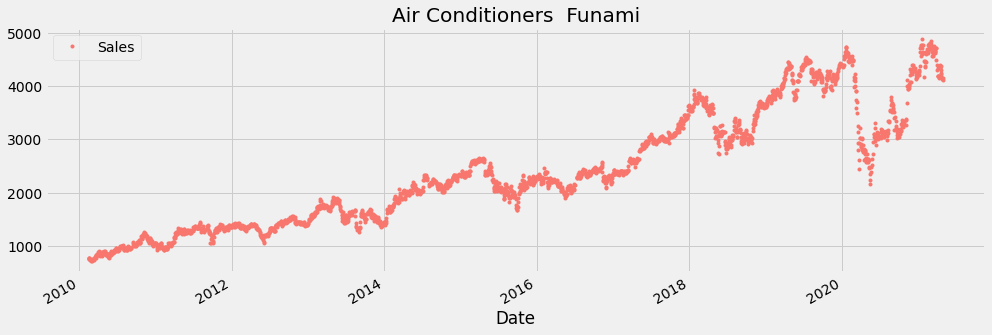

In [41]:
# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
sales1.plot(style='.', figsize=(15,5), color=color_pal[0], title=names_category[0])
plt.show()

In [42]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df = df.copy()
    df['date'] = df.index
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

In [43]:
for idx,names in enumerate(names_category):
    number = idx+1
    
    X, y = create_features( globals()['sales%s' % number], label='Sales')
    globals()['features_sales%s' % number] = pd.concat([X, y], axis=1)

<ipython-input-42-aa3ec277a247>:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['weekofyear'] = df['date'].dt.weekofyear


In [44]:
# See our features and target
features_sales1.head()

dayofweek  quarter  month  year  dayofyear  dayofmonth  \
Date                                                                 
2010-02-15          0        1      2  2010         46          15   
2010-02-16          1        1      2  2010         47          16   
2010-02-17          2        1      2  2010         48          17   
2010-02-18          3        1      2  2010         49          18   
2010-02-19          4        1      2  2010         50          19   

            weekofyear  Sales  
Date                           
2010-02-15           7  756.0  
2010-02-16           7  765.0  
2010-02-17           7  762.0  
2010-02-18           7  763.0  
2010-02-19           7  748.0

In [45]:
missing_values_count = features_sales1.isnull().sum()
missing_values_count[0:9]

dayofweek     0
quarter       0
month         0
year          0
dayofyear     0
dayofmonth    0
weekofyear    0
Sales         0
dtype: int64

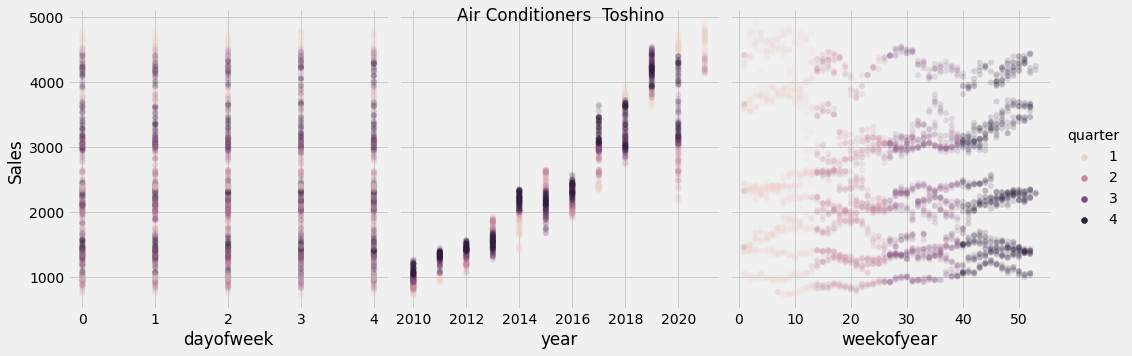

In [46]:
sns.pairplot(features_sales1,
             hue='quarter',
             x_vars=['dayofweek','year','weekofyear'],
             y_vars='Sales',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(names_category[1])
plt.show()

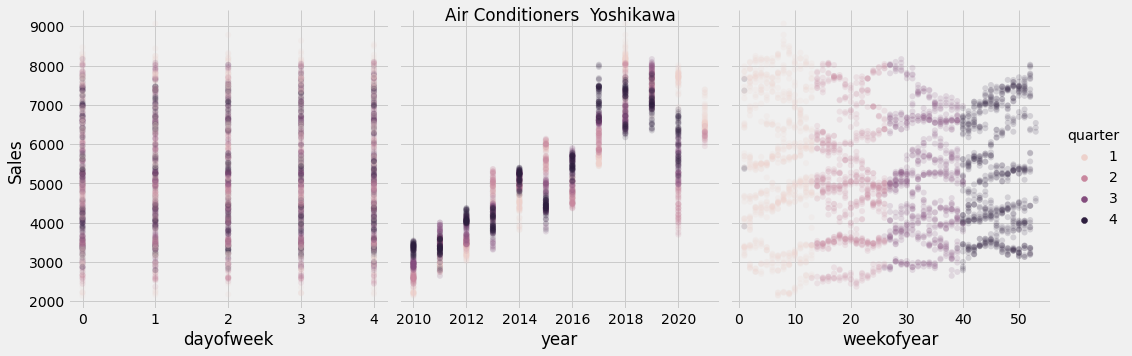

In [47]:
sns.pairplot(features_sales2,
             hue='quarter',
             x_vars=['dayofweek','year','weekofyear'],
             y_vars='Sales',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(names_category[2])
plt.show()

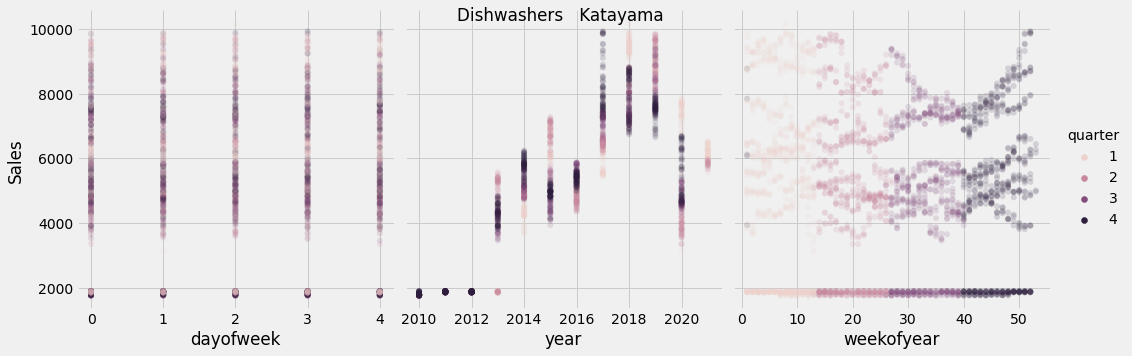

In [48]:
sns.pairplot(features_sales3,
             hue='quarter',
             x_vars=['dayofweek','year','weekofyear'],
             y_vars='Sales',
             height=5,
             plot_kws={'alpha':0.15, 'linewidth':0}
            )
plt.suptitle(names_category[3])
plt.show()

In [49]:
test_ratio = 0.2


for idx,names in enumerate(names_category):
    number = idx+1
    
    test_set_size = int(len(globals()['sales%s' % number]) * test_ratio)
    globals()['sales%s' % number+'_train'] = globals()['sales%s' % number][0:-test_set_size].copy()
    globals()['sales%s' % number+'_test'] = globals()['sales%s' % number][-test_set_size:].copy()

In [50]:
sales1_train

Sales
Date              
2010-02-15   756.0
2010-02-16   765.0
2010-02-17   762.0
2010-02-18   763.0
2010-02-19   748.0
...            ...
2019-01-23  3777.0
2019-01-24  3797.0
2019-01-25  3778.0
2019-01-28  3777.0
2019-01-29  3685.0

[2142 rows x 1 columns]

In [51]:
sales1_test

Sales
Date              
2019-01-30  3745.0
2019-01-31  3845.0
2019-02-01  3920.0
2019-02-04  3897.0
2019-02-05  3907.0
...            ...
2021-04-23  4253.0
2021-04-26  4134.0
2021-04-27  4164.0
2021-04-28  4123.0
2021-04-29  4158.0

[535 rows x 1 columns]

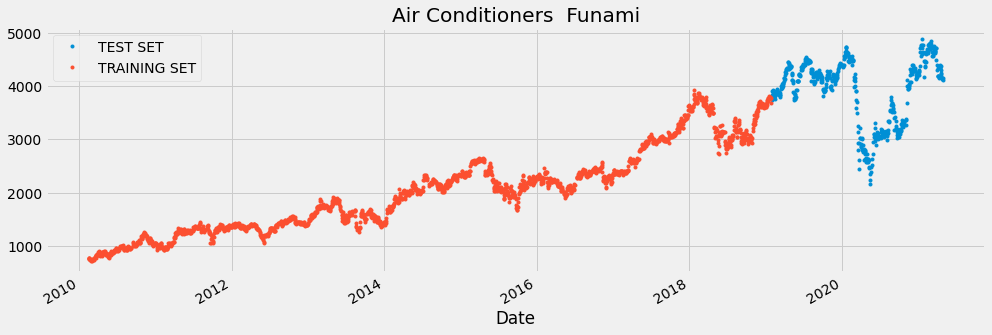

In [52]:
# Plot train and test so you can see where we have split
sales1_test \
    .rename(columns={'Sales': 'TEST SET'}) \
    .join(sales1_train.rename(columns={'Sales': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title=names_category[0], style='.')
plt.show()

In [53]:
# Format data for prophet model using ds and y
sales1_train.reset_index() \
    .rename(columns={'Date':'ds',
                     'Sales':'y'}).head()

ds      y
0 2010-02-15  756.0
1 2010-02-16  765.0
2 2010-02-17  762.0
3 2010-02-18  763.0
4 2010-02-19  748.0

In [54]:
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number+'_train'].reset_index(inplace=True)
    globals()['sales%s' % number+'_train'].rename(columns={'Date':'ds',
                     'Sales':'y'},inplace=True)
    
    missing_values_count = globals()['sales%s' % number+'_train'].isnull().sum()
    print(number)
    print(missing_values_count[0:2])

1
ds    0
y     0
dtype: int64
2
ds    0
y     0
dtype: int64
3
ds    0
y     0
dtype: int64
4
ds    0
y     0
dtype: int64
5
ds    0
y     0
dtype: int64
6
ds    0
y     0
dtype: int64
7
ds    0
y     0
dtype: int64
8
ds    0
y     0
dtype: int64
9
ds    0
y     0
dtype: int64
10
ds    0
y     0
dtype: int64
11
ds    0
y     0
dtype: int64
12
ds    0
y     0
dtype: int64
13
ds    0
y     0
dtype: int64
14
ds    0
y     0
dtype: int64
15
ds    0
y     0
dtype: int64
16
ds    0
y     0
dtype: int64
17
ds    0
y     0
dtype: int64
18
ds    0
y     0
dtype: int64
19
ds    0
y     0
dtype: int64
20
ds    0
y     0
dtype: int64
21
ds    0
y     0
dtype: int64
22
ds    0
y     0
dtype: int64
23
ds    0
y     0
dtype: int64
24
ds    0
y     0
dtype: int64
25
ds    0
y     0
dtype: int64
26
ds    0
y     0
dtype: int64
27
ds    0
y     0
dtype: int64
28
ds    0
y     0
dtype: int64
29
ds    0
y     0
dtype: int64
30
ds    0
y     0
dtype: int64
31
ds    0
y     0
dtype: int64
32
ds    0
y     

In [55]:
sales22_test

Sales
Date             
2021-02-10  298.0
2021-02-11  304.0
2021-02-15  299.0
2021-02-16  305.0
2021-02-17  299.0
2021-02-18  302.0
2021-02-19  306.0
2021-02-22  306.0
2021-02-23  299.0
2021-02-24  302.0
2021-02-25  299.0
2021-03-01  305.0
2021-03-02  310.0
2021-03-03  316.0
2021-03-04  331.0
2021-03-05  318.0
2021-03-08  305.0
2021-03-09  317.0
2021-03-10  334.0
2021-03-12  340.0
2021-03-15  352.0
2021-03-16  353.0
2021-03-17  353.0
2021-03-18  352.0
2021-03-19  347.0
2021-03-22  342.0
2021-03-23  338.0
2021-03-24  328.0
2021-03-25  330.0
2021-03-26  335.0
2021-03-29  329.0
2021-03-30  340.0
2021-03-31  337.0
2021-04-01  338.0
2021-04-05  340.0
2021-04-06  341.0
2021-04-07  335.0
2021-04-08  331.0
2021-04-09  341.0
2021-04-12  338.0
2021-04-13  334.0
2021-04-14  334.0
2021-04-15  334.0
2021-04-16  341.0
2021-04-19  349.0
2021-04-20  340.0
2021-04-21  334.0
2021-04-22  328.0
2021-04-23  323.0
2021-04-26  329.0
2021-04-27  321.0
2021-04-28  318.0
2021-04-29  313.0

In [56]:
# Setup and train model and fit
for idx,names in enumerate(names_category):
    number = idx+1
    print(number)
    globals()['model%s' % number] = Prophet()
    globals()['model%s' % number].fit(globals()['sales%s' % number+'_train'])

1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


21


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


22


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


23


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


34


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


35


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


36


In [57]:
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number+'_test'].reset_index(inplace=True)
    globals()['sales%s' % number+'_test'].rename(columns={'Date':'ds'},inplace=True)
    
    missing_values_count = globals()['sales%s' % number+'_test'].isnull().sum()
    print(number)
    print(missing_values_count[0:2])

1
ds       0
Sales    0
dtype: int64
2
ds       0
Sales    0
dtype: int64
3
ds       0
Sales    0
dtype: int64
4
ds       0
Sales    0
dtype: int64
5
ds       0
Sales    0
dtype: int64
6
ds       0
Sales    0
dtype: int64
7
ds       0
Sales    0
dtype: int64
8
ds       0
Sales    0
dtype: int64
9
ds       0
Sales    0
dtype: int64
10
ds       0
Sales    0
dtype: int64
11
ds       0
Sales    0
dtype: int64
12
ds       0
Sales    0
dtype: int64
13
ds       0
Sales    0
dtype: int64
14
ds       0
Sales    0
dtype: int64
15
ds       0
Sales    0
dtype: int64
16
ds       0
Sales    0
dtype: int64
17
ds       0
Sales    0
dtype: int64
18
ds       0
Sales    0
dtype: int64
19
ds       0
Sales    0
dtype: int64
20
ds       0
Sales    0
dtype: int64
21
ds       0
Sales    0
dtype: int64
22
ds       0
Sales    0
dtype: int64
23
ds       0
Sales    0
dtype: int64
24
ds       0
Sales    0
dtype: int64
25
ds       0
Sales    0
dtype: int64
26
ds       0
Sales    0
dtype: int64
27
ds       0
Sales  

In [58]:
sales22_test

ds  Sales
0  2021-02-10  298.0
1  2021-02-11  304.0
2  2021-02-15  299.0
3  2021-02-16  305.0
4  2021-02-17  299.0
5  2021-02-18  302.0
6  2021-02-19  306.0
7  2021-02-22  306.0
8  2021-02-23  299.0
9  2021-02-24  302.0
10 2021-02-25  299.0
11 2021-03-01  305.0
12 2021-03-02  310.0
13 2021-03-03  316.0
14 2021-03-04  331.0
15 2021-03-05  318.0
16 2021-03-08  305.0
17 2021-03-09  317.0
18 2021-03-10  334.0
19 2021-03-12  340.0
20 2021-03-15  352.0
21 2021-03-16  353.0
22 2021-03-17  353.0
23 2021-03-18  352.0
24 2021-03-19  347.0
25 2021-03-22  342.0
26 2021-03-23  338.0
27 2021-03-24  328.0
28 2021-03-25  330.0
29 2021-03-26  335.0
30 2021-03-29  329.0
31 2021-03-30  340.0
32 2021-03-31  337.0
33 2021-04-01  338.0
34 2021-04-05  340.0
35 2021-04-06  341.0
36 2021-04-07  335.0
37 2021-04-08  331.0
38 2021-04-09  341.0
39 2021-04-12  338.0
40 2021-04-13  334.0
41 2021-04-14  334.0
42 2021-04-15  334.0
43 2021-04-16  341.0
44 2021-04-19  349.0
45 2021-04-20  340.0
46 2021-04-21  334.0
47 2021-04-22  328.0
48 2021-04-23  323.0
49 2021-04-26  329.0
50 2021-04-27  321.0
51 2021-04-28  318.0
52 2021-04-29  313.0

In [59]:
# Predict on training set with model
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number+'_test_fcst'] = globals()['model%s' % number].predict(globals()['sales%s' % number+'_test'])
    print(number)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [60]:
sales1_test_fcst.head()

ds        trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
0 2019-01-30  3533.032364  3398.800726  3828.888061  3533.032364  3533.032364   
1 2019-01-31  3533.965458  3408.404829  3807.283067  3533.965458  3533.965458   
2 2019-02-01  3534.898552  3416.554658  3826.736944  3534.898552  3534.898552   
3 2019-02-04  3537.697833  3412.025291  3813.722230  3537.697833  3537.697833   
4 2019-02-05  3538.630926  3422.168191  3823.495045  3538.630926  3538.630926   

   additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0       78.196053             78.196053             78.196053 -1.127709   
1       82.300024             82.300024             82.300024  3.347589   
2       82.167153             82.167153             82.167153  3.512615   
3       75.627917             75.627917             75.627917 -2.597276   
4       76.288859             76.288859             76.288859 -1.941566   

   weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0     -1.127709     -1.127709  79.323762     79.323762     79.323762   
1      3.347589      3.347589  78.952435     78.952435     78.952435   
2      3.512615      3.512615  78.654538     78.654538     78.654538   
3     -2.597276     -2.597276  78.225193     78.225193     78.225193   
4     -1.941566     -1.941566  78.230425     78.230425     78.230425   

   multiplicative_terms  multiplicative_terms_lower  \
0                   0.0                         0.0   
1                   0.0                         0.0   
2                   0.0                         0.0   
3                   0.0                         0.0   
4                   0.0                         0.0   

   multiplicative_terms_upper         yhat  
0                         0.0  3611.228417  
1                         0.0  3616.265482  
2                         0.0  3617.065704  
3                         0.0  3613.325750  
4                         0.0  3614.919786

In [61]:
sales1_test_fcst.tail()

ds        trend   yhat_lower   yhat_upper  trend_lower  \
530 2021-04-23  4292.570651  3045.853084  5690.869690  2982.558589   
531 2021-04-26  4295.369932  3019.491466  5662.096309  2976.165769   
532 2021-04-27  4296.303026  3008.491602  5681.212346  2972.214083   
533 2021-04-28  4297.236120  2980.975392  5663.803282  2970.938086   
534 2021-04-29  4298.169213  2996.530021  5696.229418  2969.662088   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
530  5587.161912       71.992716             71.992716             71.992716   
531  5596.352455       52.905932             52.905932             52.905932   
532  5599.341106       48.694217             48.694217             48.694217   
533  5602.329758       44.434610             44.434610             44.434610   
534  5605.318410       43.677725             43.677725             43.677725   

       weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
530  3.512615      3.512615      3.512615  68.480101     68.480101   
531 -2.597276     -2.597276     -2.597276  55.503208     55.503208   
532 -1.941566     -1.941566     -1.941566  50.635783     50.635783   
533 -1.127709     -1.127709     -1.127709  45.562320     45.562320   
534  3.347589      3.347589      3.347589  40.330136     40.330136   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
530     68.480101                   0.0                         0.0   
531     55.503208                   0.0                         0.0   
532     50.635783                   0.0                         0.0   
533     45.562320                   0.0                         0.0   
534     40.330136                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
530                         0.0  4364.563368  
531                         0.0  4348.275865  
532                         0.0  4344.997243  
533                         0.0  4341.670730  
534                         0.0  4341.846938

In [62]:
sales1_test.tail()

ds   Sales
530 2021-04-23  4253.0
531 2021-04-26  4134.0
532 2021-04-27  4164.0
533 2021-04-28  4123.0
534 2021-04-29  4158.0

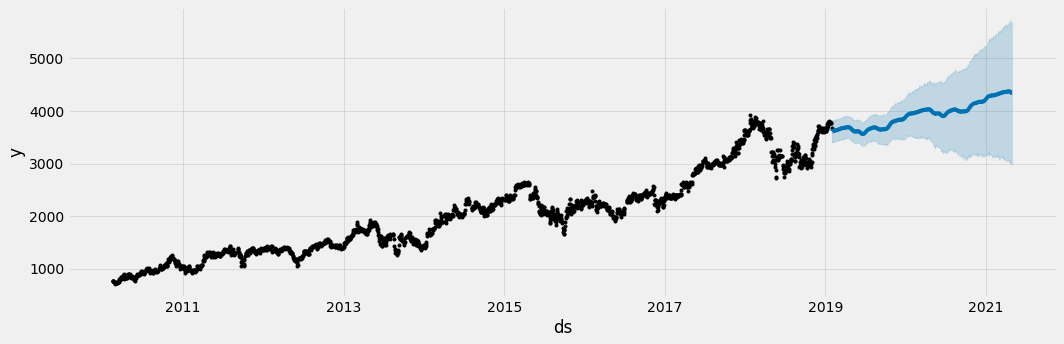

In [63]:
# Plot the forecast
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model1.plot(sales1_test_fcst,
                 ax=ax)
plt.show()


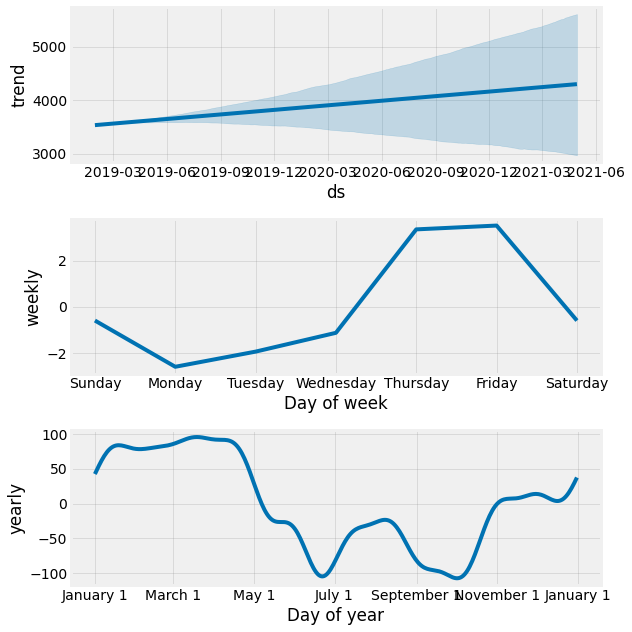

In [64]:
# Plot the components of the model
fig = model1.plot_components(sales1_test_fcst)

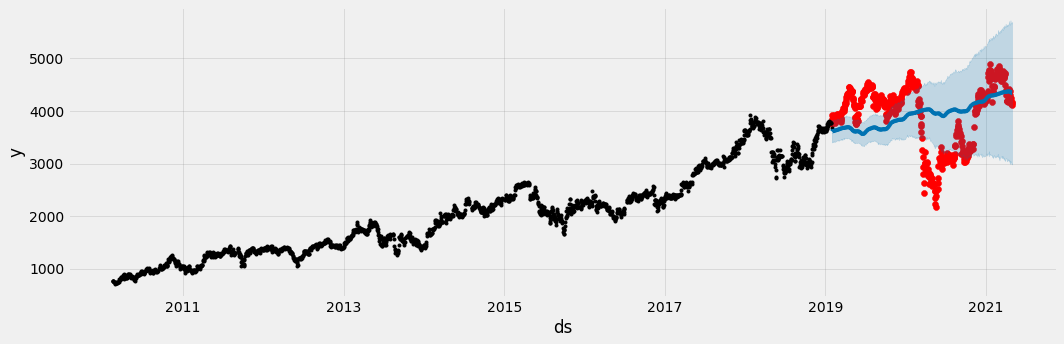

In [65]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(sales1_test['ds'], sales1_test['Sales'], color='r')
fig = model1.plot(sales1_test_fcst, ax=ax)

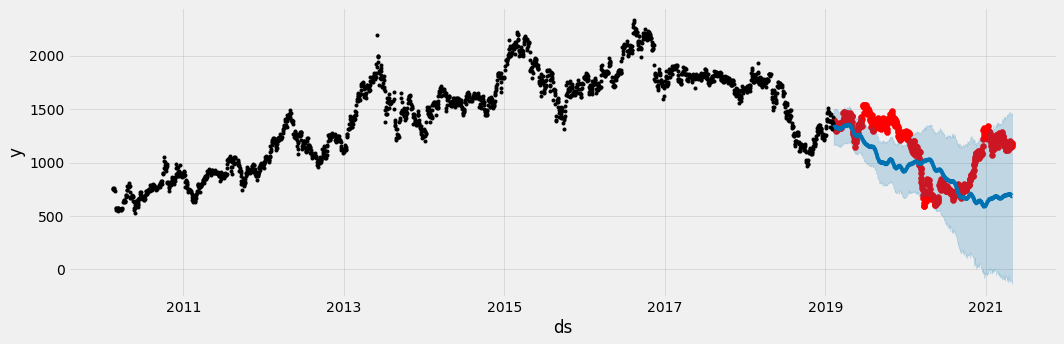

In [66]:
# Plot the forecast with the actuals
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(sales28_test['ds'], sales28_test['Sales'], color='r')
fig = model28.plot(sales28_test_fcst, ax=ax)

In [67]:
mse_li = []
for idx,names in enumerate(names_category):
    number = idx+1
    mse_li.append(mean_squared_error(y_true=globals()['sales%s' % number+'_test']['Sales'],
                   y_pred=globals()['sales%s' % number+'_test_fcst']['yhat']))

print(sum(mse_li)/len(mse_li))

14003050.024300894


In [68]:
mae_li = []
for idx,names in enumerate(names_category):
    number = idx+1
    mae_li.append(mean_absolute_error(y_true=globals()['sales%s' % number+'_test']['Sales'],
                   y_pred=globals()['sales%s' % number+'_test_fcst']['yhat']))

print(sum(mae_li)/len(mae_li))

1601.1766788122113


In [69]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [70]:
mape_li = []
for idx,names in enumerate(names_category):
    number = idx+1
    mape_li.append(mean_absolute_percentage_error(y_true=globals()['sales%s' % number+'_test']['Sales'],
                   y_pred=globals()['sales%s' % number+'_test_fcst']['yhat']))

print(sum(mape_li)/len(mape_li))

60.438226966801636


In [71]:
cal = calendar()
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['train%s' % number+'_holidays'] = cal.holidays(start=globals()['sales%s' % number+'_train']['ds'].min(),
                              end=globals()['sales%s' % number+'_train']['ds'].max())
    globals()['test%s' % number+'_holidays'] = cal.holidays(start=globals()['sales%s' % number+'_test']['ds'].min(),
                             end=globals()['sales%s' % number+'_test']['ds'].min())

In [72]:
sales1

Sales
Date              
2010-02-15   756.0
2010-02-16   765.0
2010-02-17   762.0
2010-02-18   763.0
2010-02-19   748.0
...            ...
2021-04-23  4253.0
2021-04-26  4134.0
2021-04-27  4164.0
2021-04-28  4123.0
2021-04-29  4158.0

[2677 rows x 1 columns]

In [73]:
# Create a dataframe with holiday, ds columns
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number]['date'] = globals()['sales%s' % number].index.date
    globals()['sales%s' % number]['is_holiday'] = globals()['sales%s' % number].date.isin([d.date() for d in cal.holidays()])
    globals()['holiday%s' % number+"_df"] = globals()['sales%s' % number].loc[globals()['sales%s' % number]['is_holiday']] \
        .reset_index() \
        .rename(columns={'Date':'ds'})
    globals()['holiday%s' % number+"_df"]['holiday'] = 'USFederalHoliday'
    globals()['holiday%s' % number+"_df"].drop(['Sales','date','is_holiday'], axis=1,inplace=True)
    globals()['holiday%s' % number+"_df"]['ds'] = pd.to_datetime(globals()['holiday%s' % number+"_df"]['ds'])

In [74]:
holiday22_df.head()

ds           holiday
0 2020-07-03  USFederalHoliday
1 2020-09-07  USFederalHoliday
2 2020-10-12  USFederalHoliday
3 2020-11-11  USFederalHoliday
4 2021-01-18  USFederalHoliday

In [75]:
# Setup and train model and fit with holidays
for idx,names in enumerate(names_category):
    number = idx+1
    
    globals()['model%s' % number+'_with_holidays'] = Prophet(holidays=globals()['holiday%s' % number+"_df"])
    globals()['model%s' % number+'_with_holidays'].fit(globals()['sales%s' % number+'_train'])
    
    print(number)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


21
22

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


23


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


34


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


35
36


In [76]:
# Predict on training set with model
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number+'_test_fcst_with_hols'] = globals()['model%s' % number+'_with_holidays'].predict(globals()['sales%s' % number+'_test'])
    
    print(number)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


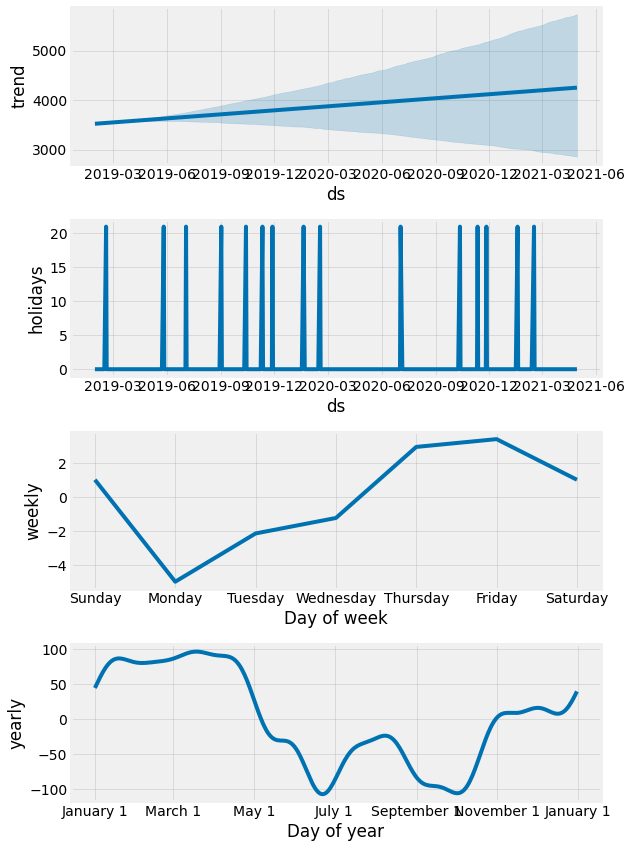

In [77]:
# Plot the components of the model
fig2 = model1_with_holidays.plot_components(sales1_test_fcst_with_hols)

In [78]:
mse_li_hols = []
for idx,names in enumerate(names_category):
    number = idx+1
    mse_li_hols.append(mean_squared_error(y_true=globals()['sales%s' % number+'_test']['Sales'],
                   y_pred=globals()['sales%s' % number+'_test_fcst_with_hols']['yhat']))

print(sum(mse_li_hols)/len(mse_li_hols))

14034891.657592602


In [79]:
mae_li_hols = []
for idx,names in enumerate(names_category):
    number = idx+1
    mae_li_hols.append(mean_absolute_error(y_true=globals()['sales%s' % number+'_test']['Sales'],
                   y_pred=globals()['sales%s' % number+'_test_fcst_with_hols']['yhat']))

print(sum(mae_li_hols)/len(mae_li_hols))

1602.4638622962602


In [80]:
mape_li_hols = []
for idx,names in enumerate(names_category):
    number = idx+1
    mape_li_hols.append(mean_absolute_percentage_error(y_true=globals()['sales%s' % number+'_test']['Sales'],
                   y_pred=globals()['sales%s' % number+'_test_fcst_with_hols']['yhat']))

print(sum(mape_li_hols)/len(mape_li_hols))

60.45777240394304


In [81]:
sales22

Sales        date  is_holiday
Date                                     
2020-03-13  140.0  2020-03-13       False
2020-03-16  125.0  2020-03-16       False
2020-03-17  125.0  2020-03-17       False
2020-03-18  136.0  2020-03-18       False
2020-03-19  133.0  2020-03-19       False
...           ...         ...         ...
2021-04-23  323.0  2021-04-23       False
2021-04-26  329.0  2021-04-26       False
2021-04-27  321.0  2021-04-27       False
2021-04-28  318.0  2021-04-28       False
2021-04-29  313.0  2021-04-29       False

[266 rows x 3 columns]

In [82]:
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number].reset_index(inplace=True)
    globals()['sales%s' % number].rename(columns={'Date':'ds',
                                                  'Sales': 'y'},inplace=True)
    globals()['sales%s' % number].drop(['date','is_holiday'], axis=1,inplace=True)
    
    missing_values_count = globals()['sales%s' % number].isnull().sum()
    print(number)
    print(globals()['sales%s' % number].dtypes)
    print(missing_values_count[0:2])

1
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
2
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
3
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
4
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
5
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
6
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
7
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
8
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
9
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
10
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
11
ds    datetime64[ns]
y            float64
dtype: object
ds    0
y     0
dtype: int64
12
ds    datetime64[ns]
y            floa

In [83]:
sales22

ds      y
0   2020-03-13  140.0
1   2020-03-16  125.0
2   2020-03-17  125.0
3   2020-03-18  136.0
4   2020-03-19  133.0
..         ...    ...
261 2021-04-23  323.0
262 2021-04-26  329.0
263 2021-04-27  321.0
264 2021-04-28  318.0
265 2021-04-29  313.0

[266 rows x 2 columns]

In [84]:
df.Date.max()

Timestamp('2021-04-29 00:00:00')

In [85]:
# Setup and train model and fit
for idx,names in enumerate(names_category):
    number = idx+1
    print(number)
    globals()['model%s' % number+'_final'] = Prophet()
    globals()['model%s' % number+'_final'].fit(globals()['sales%s' % number])

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


4


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


5


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


6


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


7


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


8


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


9


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


11


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


14


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


15


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


16


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


18


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


19


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


20


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


21


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


22


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


23


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


25


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


33


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


34


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


35


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


36


In [86]:
for idx,names in enumerate(names_category):
    number = idx + 1
    globals()['df%s' % number+'_test'] = pd.DataFrame(columns = ['ds'])
    globals()['df%s' % number+'_test']['ds'] = pd.date_range(start=globals()['sales%s' % number].ds.max(), periods = 730, freq='B')

In [87]:
df1_test

ds
0   2021-04-29
1   2021-04-30
2   2021-05-03
3   2021-05-04
4   2021-05-05
..         ...
725 2024-02-08
726 2024-02-09
727 2024-02-12
728 2024-02-13
729 2024-02-14

[730 rows x 1 columns]

In [88]:
# Predict on training set with model
for idx,names in enumerate(names_category):
    number = idx+1
    globals()['sales%s' % number+'_test_fcst_final'] = globals()['model%s' % number+'_final'].predict(globals()['df%s' % number+'_test'])
    print(number)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


In [89]:
sales1_test_fcst_final

ds        trend   yhat_lower   yhat_upper  trend_lower  \
0   2021-04-29  3941.643523  3536.638203  4329.328396  3941.643523   
1   2021-04-30  3941.880885  3567.016355  4324.393968  3941.880885   
2   2021-05-03  3942.592973  3507.259477  4337.477500  3942.592973   
3   2021-05-04  3942.830336  3491.090869  4290.460829  3942.830336   
4   2021-05-05  3943.067698  3487.949441  4313.750934  3943.067698   
..         ...          ...          ...          ...          ...   
725 2024-02-08  4182.566567  3693.044527  5053.033702  3583.295399   
726 2024-02-09  4182.803930  3642.265577  5164.254444  3582.678338   
727 2024-02-12  4183.516017  3630.679603  5151.259376  3580.827154   
728 2024-02-13  4183.753380  3681.529589  5135.231494  3580.210092   
729 2024-02-14  4183.990743  3611.701768  5140.038447  3579.593031   

     trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0    3941.643523        5.473603              5.473603              5.473603   
1    3941.880885        5.406903              5.406903              5.406903   
2    3942.592973      -32.296228            -32.296228            -32.296228   
3    3942.830336      -46.118295            -46.118295            -46.118295   
4    3943.067698      -47.000124            -47.000124            -47.000124   
..           ...             ...                   ...                   ...   
725  4811.934342      175.397763            175.397763            175.397763   
726  4812.664552      184.275203            184.275203            184.275203   
727  4815.005737      175.914116            175.914116            175.914116   
728  4816.177504      172.239940            172.239940            172.239940   
729  4817.349272      181.432345            181.432345            181.432345   

        weekly  weekly_lower  weekly_upper      yearly  yearly_lower  \
0    14.518445     14.518445     14.518445   -9.044842     -9.044842   
1    22.956122     22.956122     22.956122  -17.549218    -17.549218   
2    11.726233     11.726233     11.726233  -44.022461    -44.022461   
3     6.725565      6.725565      6.725565  -52.843860    -52.843860   
4    14.494158     14.494158     14.494158  -61.494282    -61.494282   
..         ...           ...           ...         ...           ...   
725  14.518445     14.518445     14.518445  160.879318    160.879318   
726  22.956122     22.956122     22.956122  161.319081    161.319081   
727  11.726233     11.726233     11.726233  164.187883    164.187883   
728   6.725565      6.725565      6.725565  165.514376    165.514376   
729  14.494158     14.494158     14.494158  166.938187    166.938187   

     yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
0       -9.044842                   0.0                         0.0   
1      -17.549218                   0.0                         0.0   
2      -44.022461                   0.0                         0.0   
3      -52.843860                   0.0                         0.0   
4      -61.494282                   0.0                         0.0   
..            ...                   ...                         ...   
725    160.879318                   0.0                         0.0   
726    161.319081                   0.0                         0.0   
727    164.187883                   0.0                         0.0   
728    165.514376                   0.0                         0.0   
729    166.938187                   0.0                         0.0   

     multiplicative_terms_upper         yhat  
0                           0.0  3947.117126  
1                           0.0  3947.287789  
2                           0.0  3910.296745  
3                           0.0  3896.712040  
4                           0.0  3896.067575  
..                          ...          ...  
725                         0.0  4357.964330  
726                         0.0  4367.079132  
727                         0.0  4359.430134  
728                   

<ipython-input-90-d481464be931>:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(1)


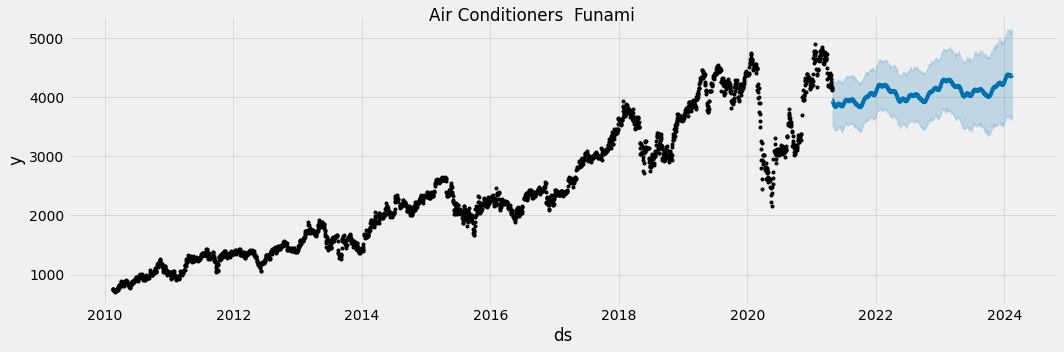

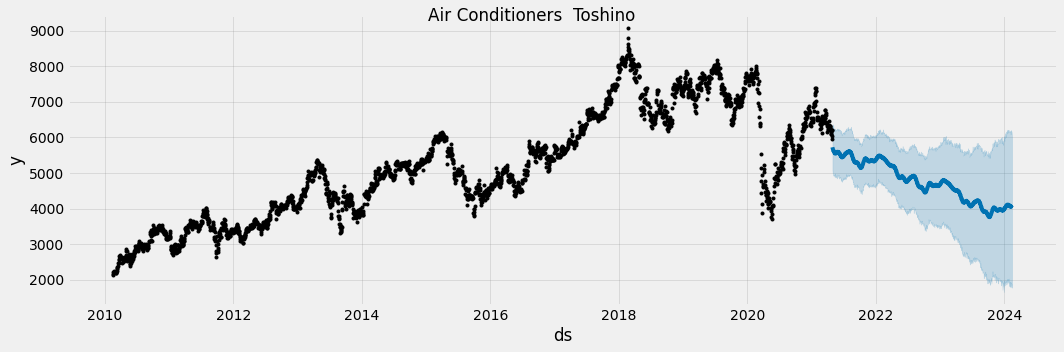

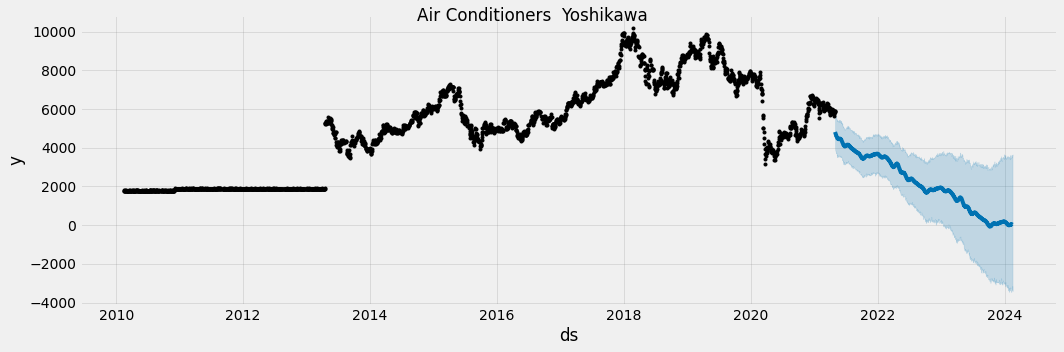

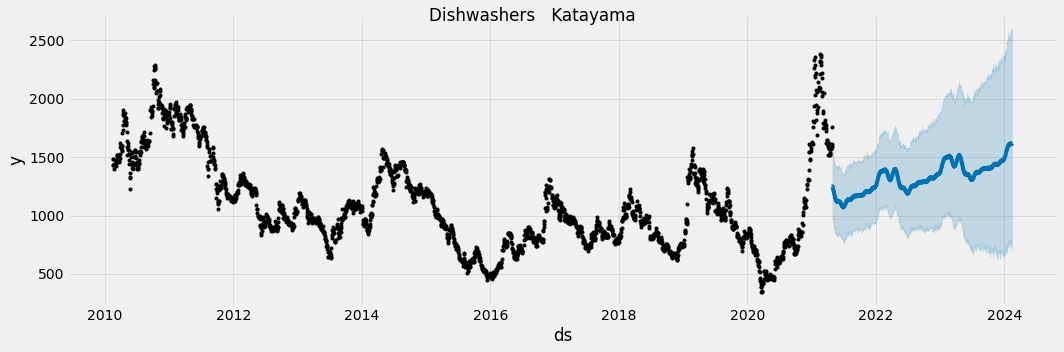

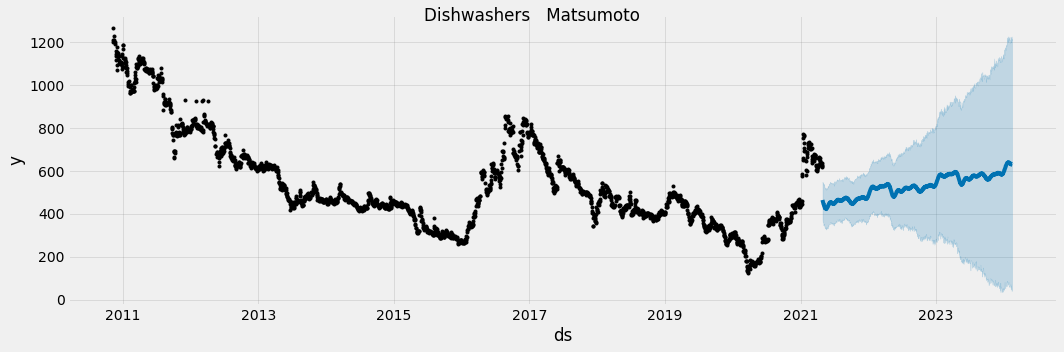

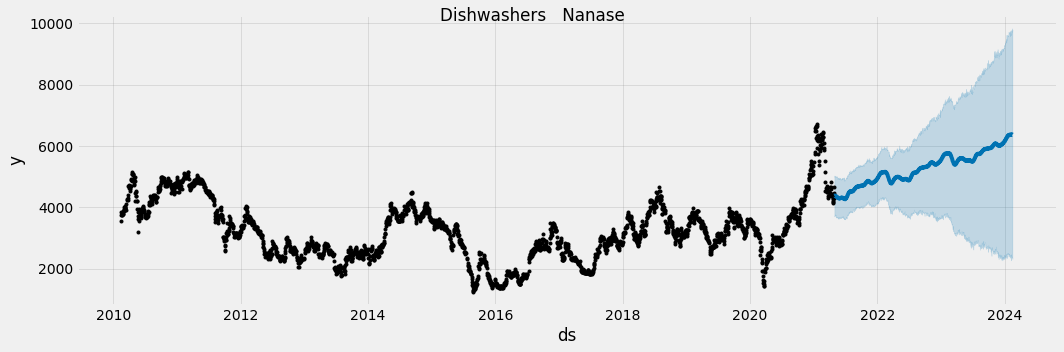

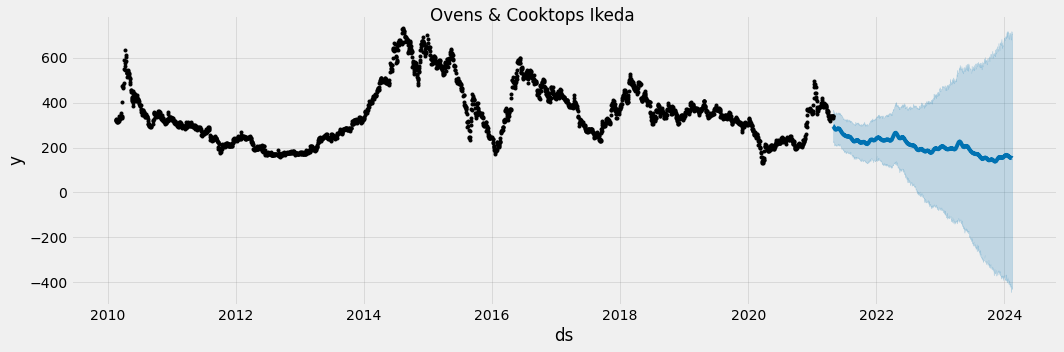

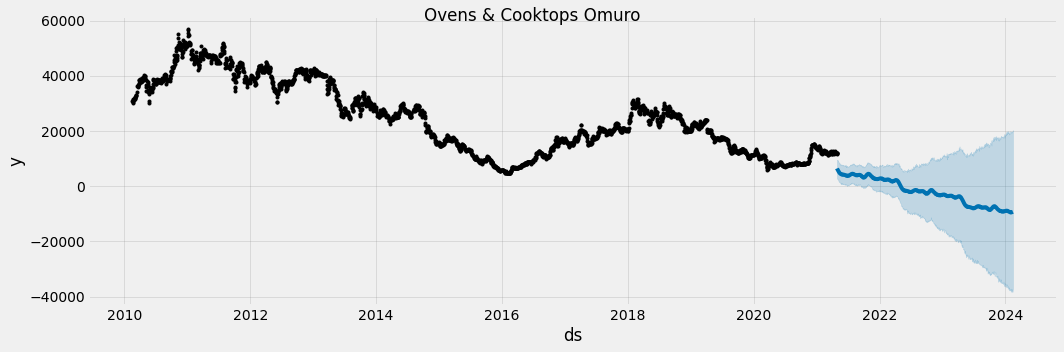

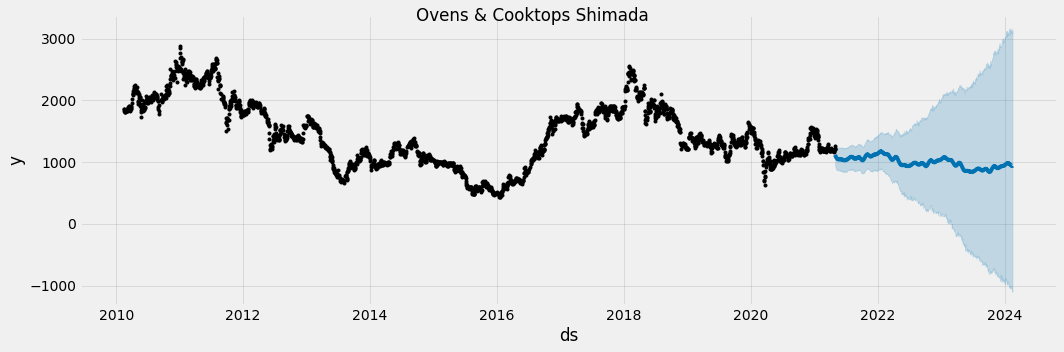

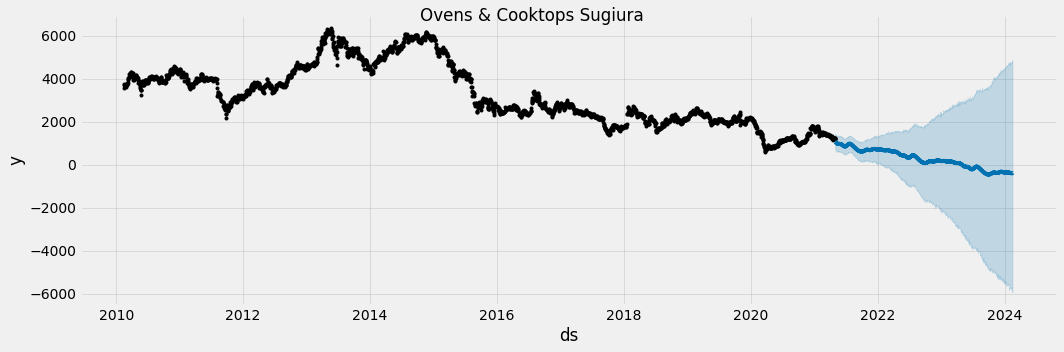

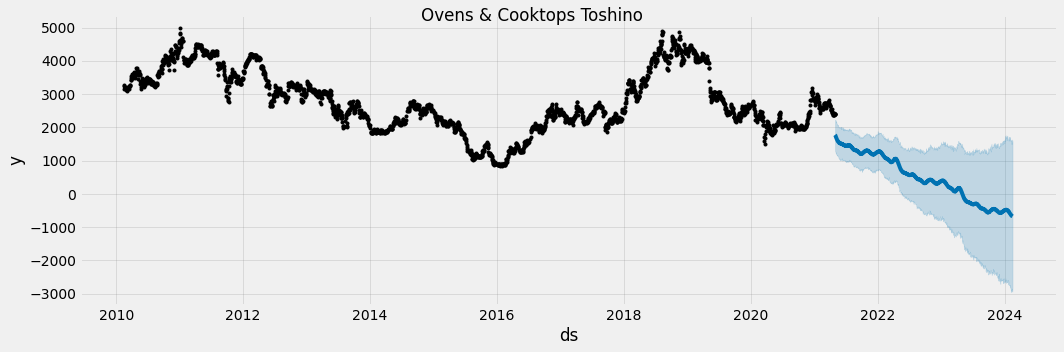

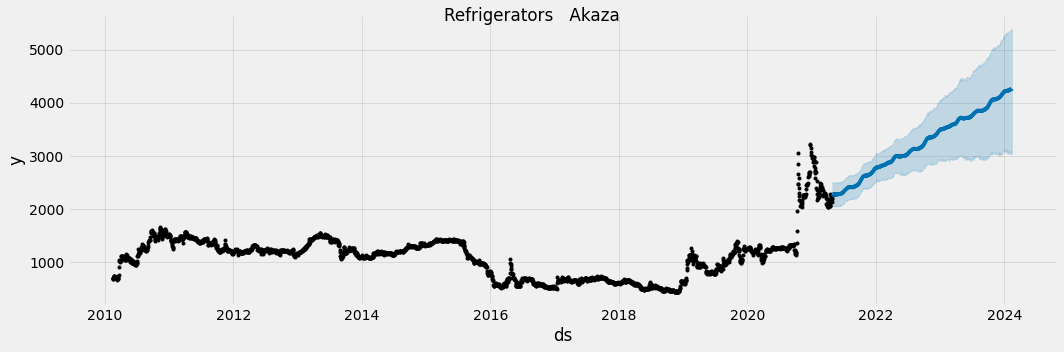

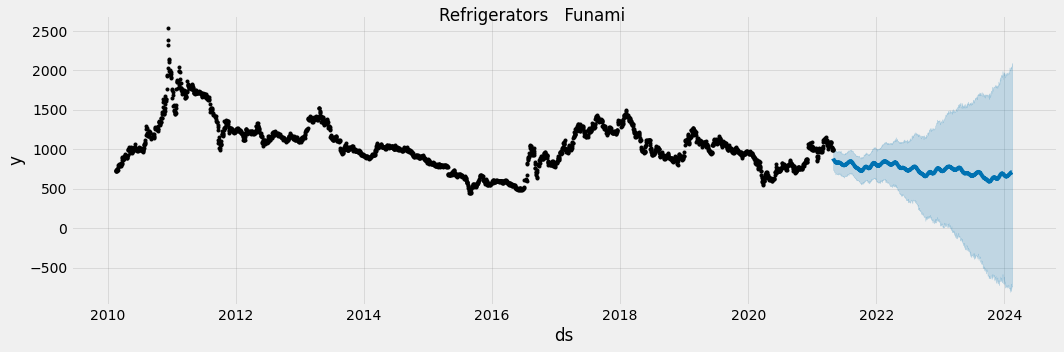

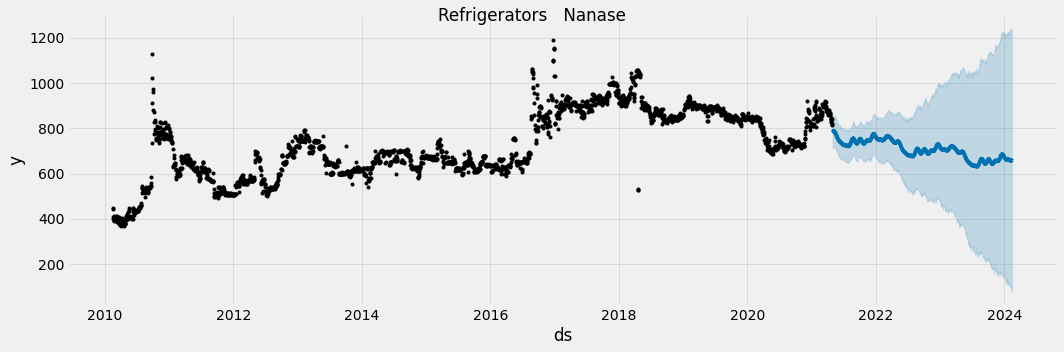

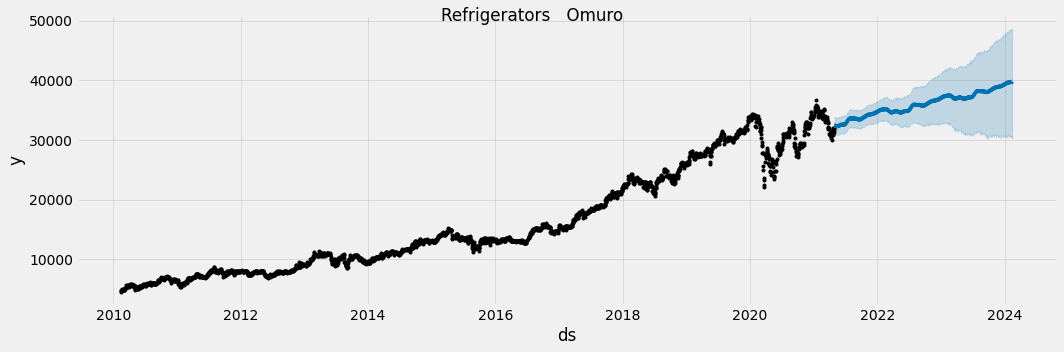

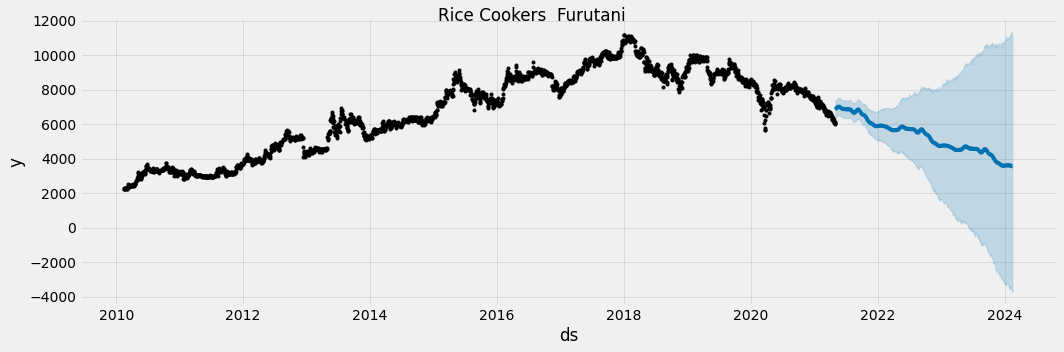

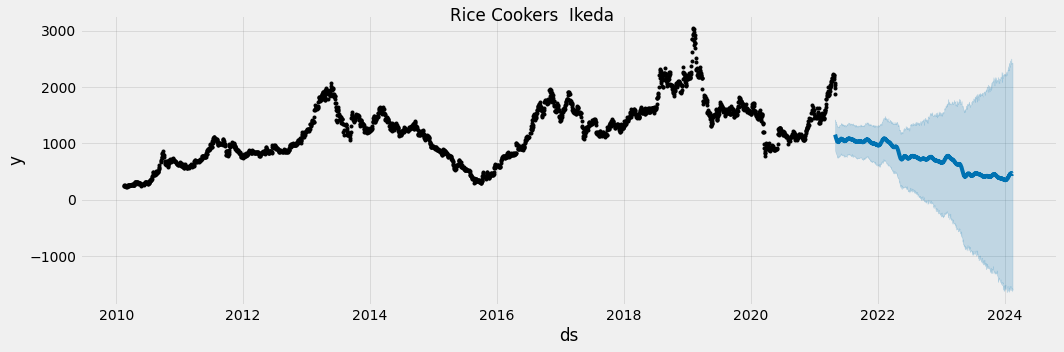

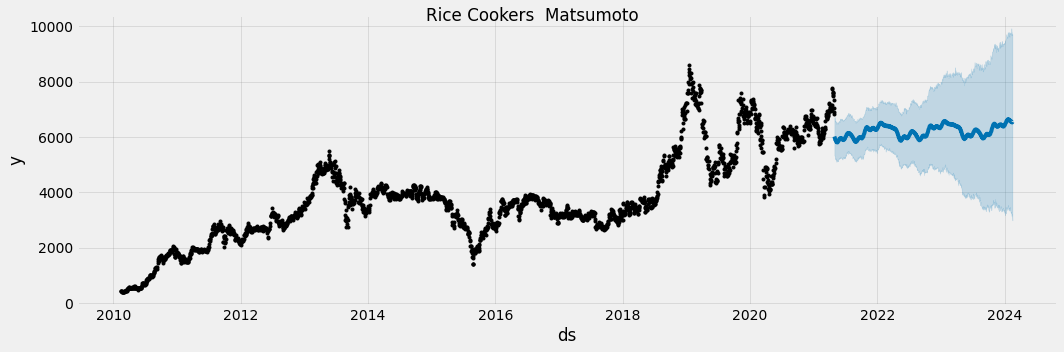

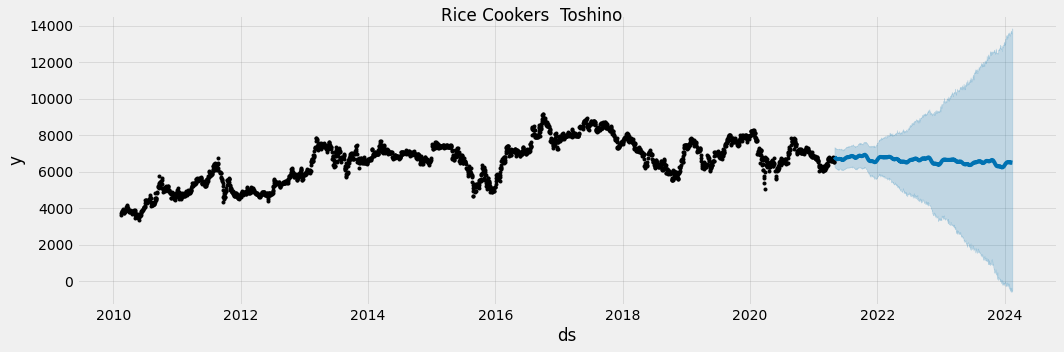

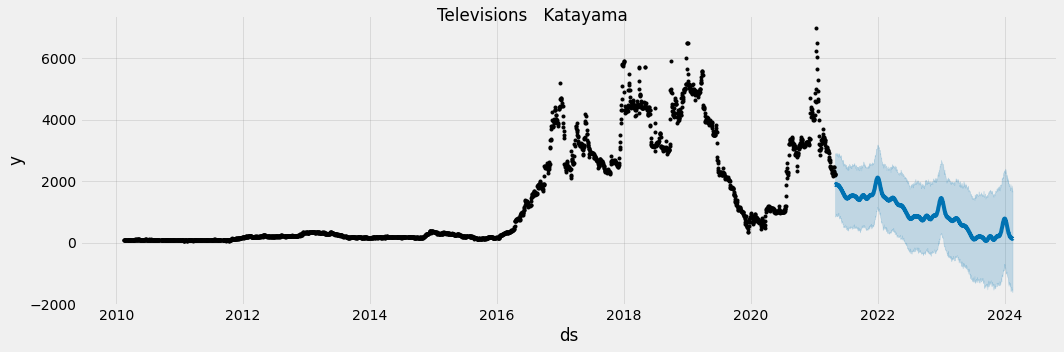

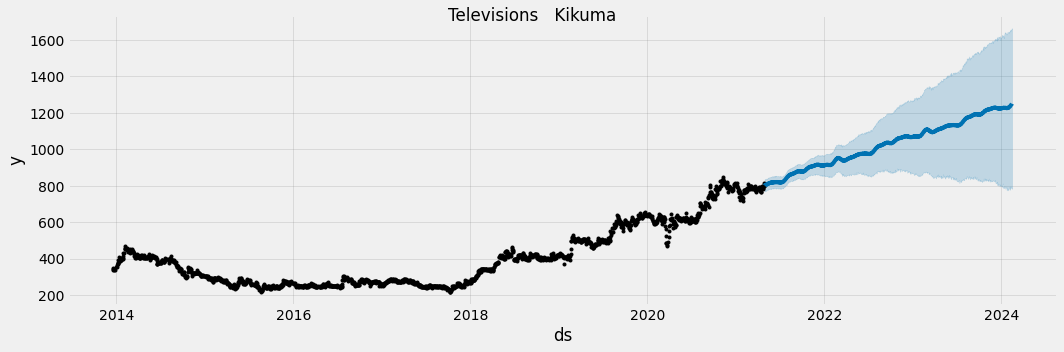

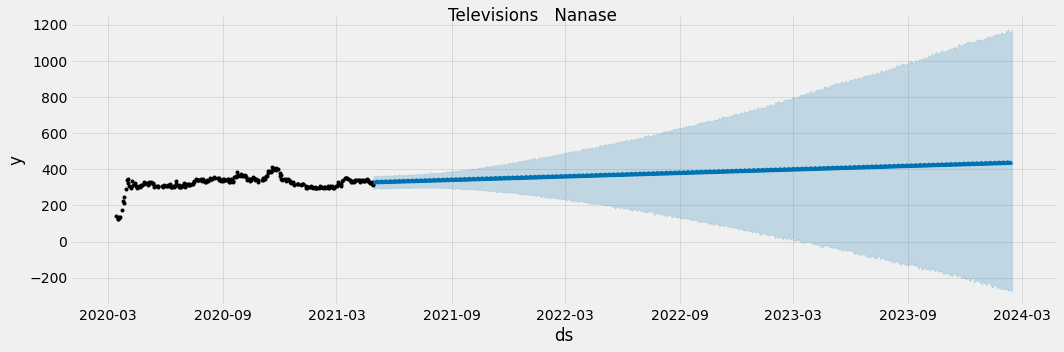

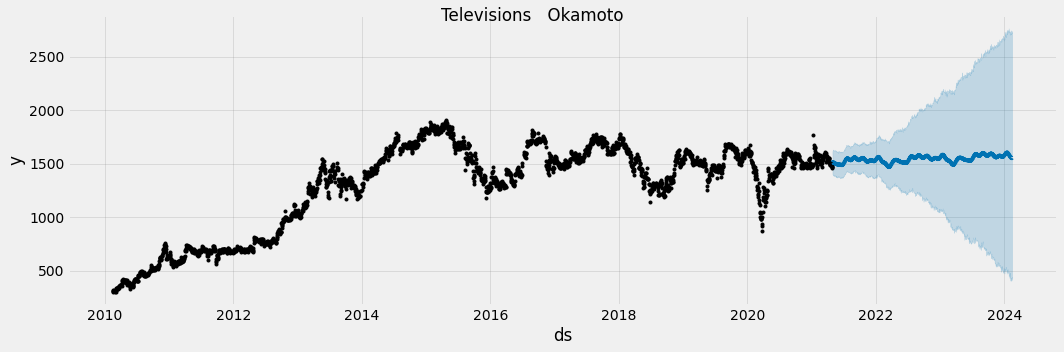

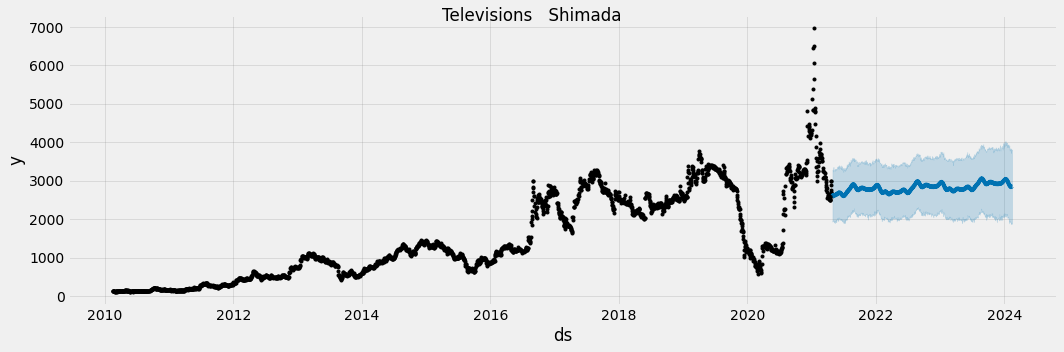

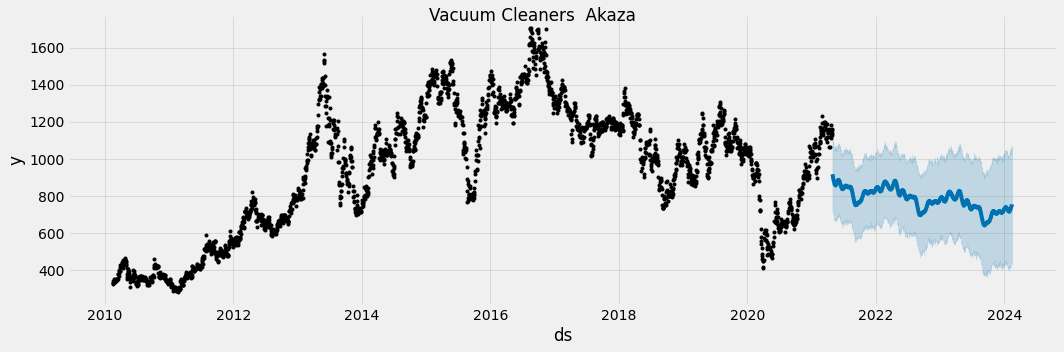

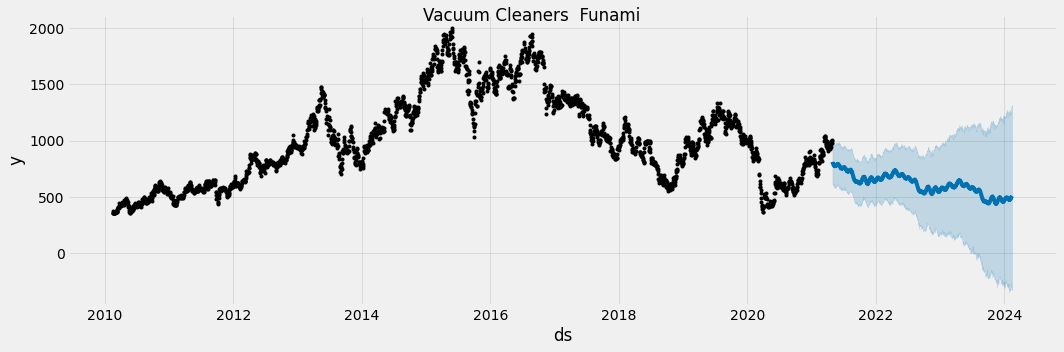

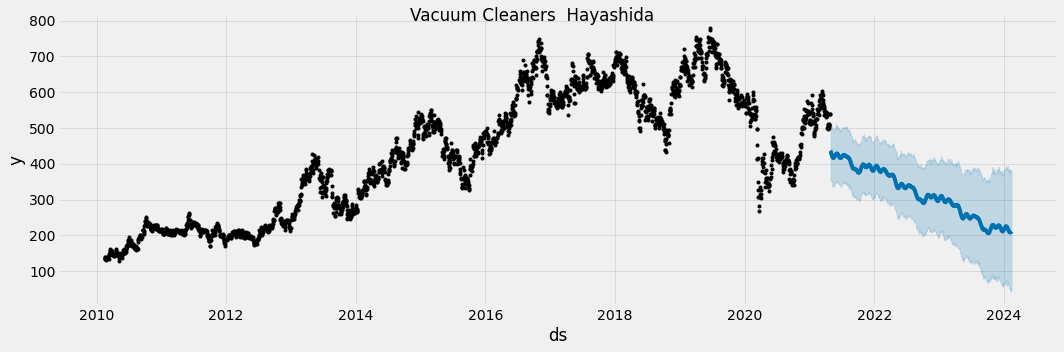

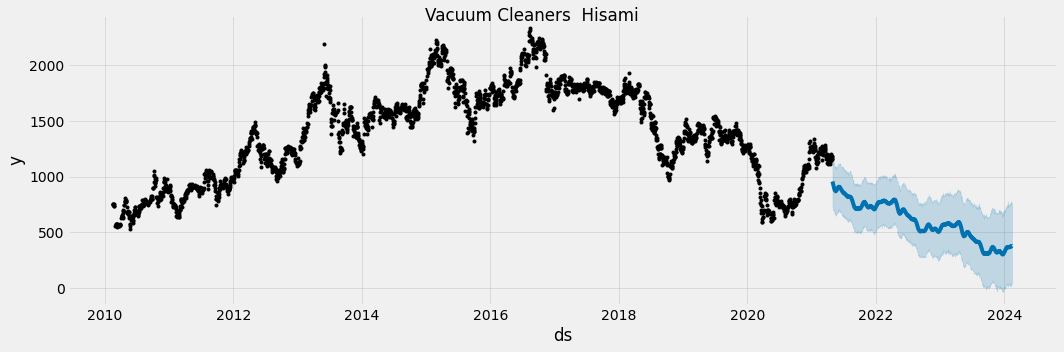

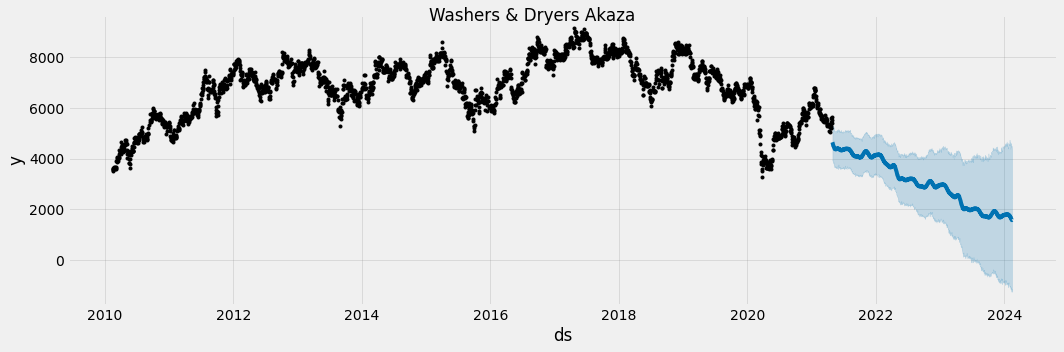

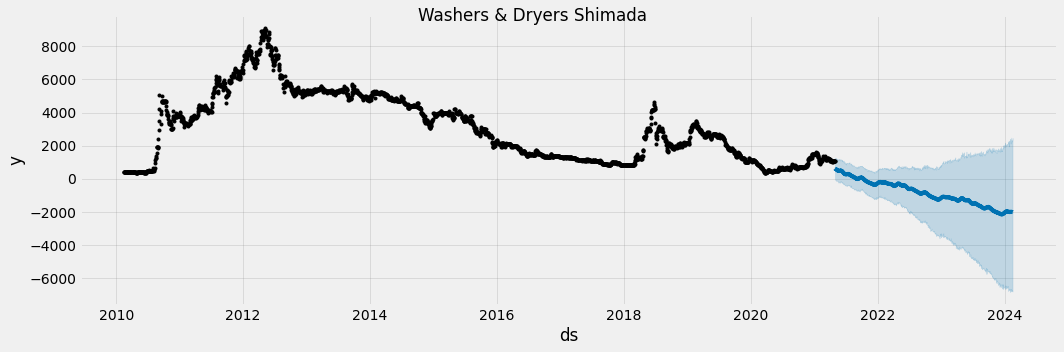

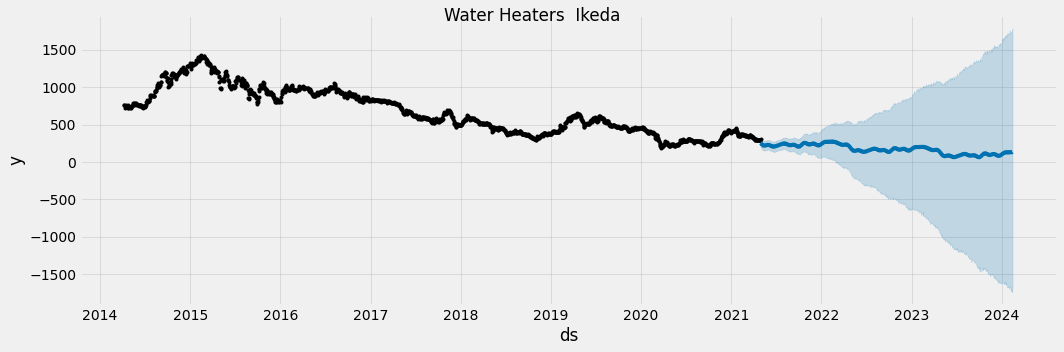

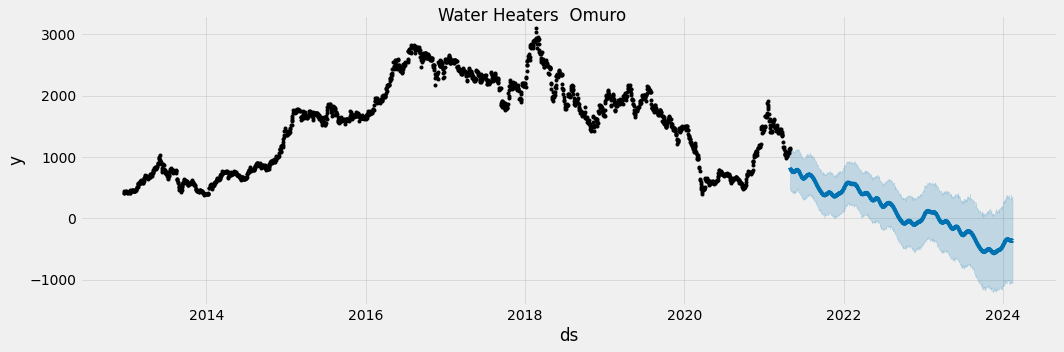

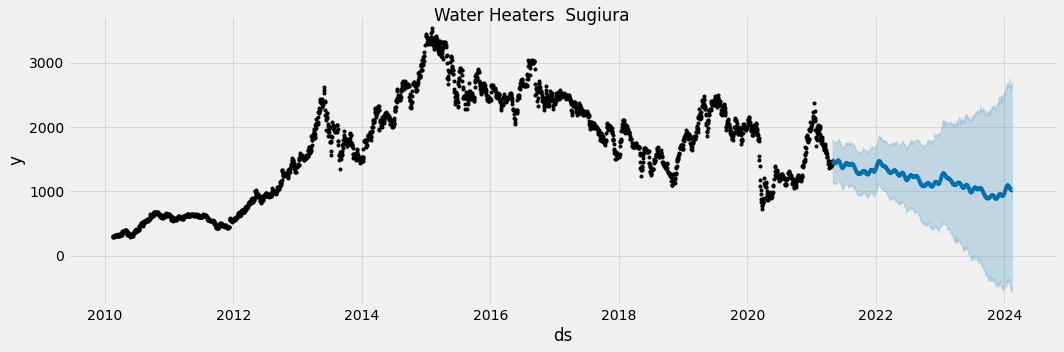

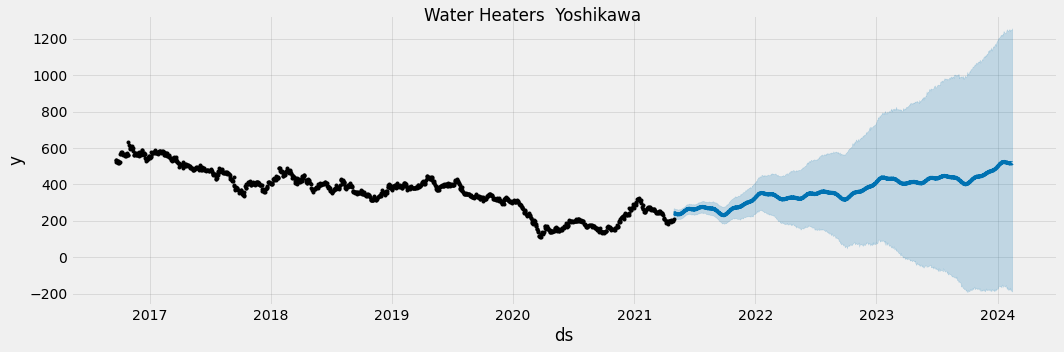

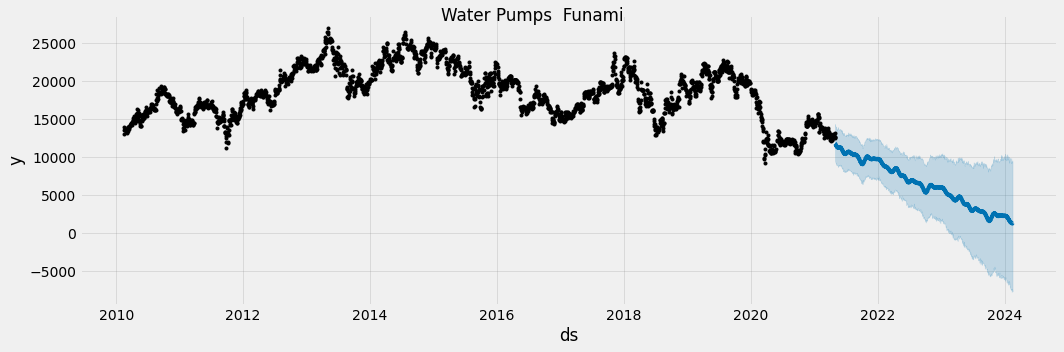

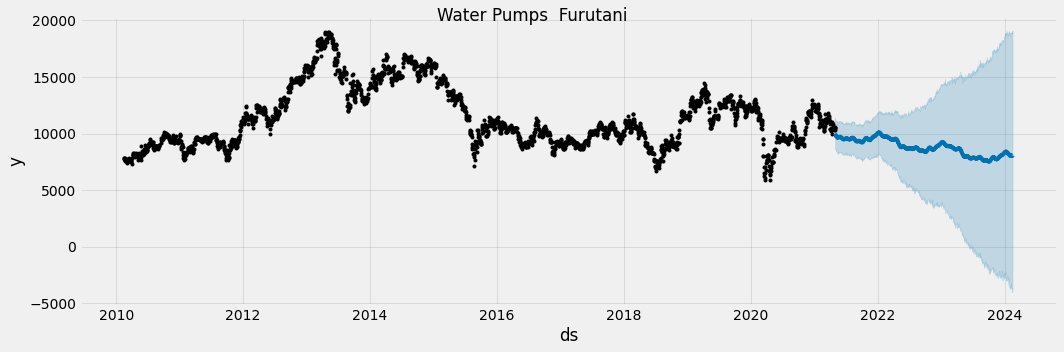

In [90]:
# Plot the forecast
rows = 36
columns = 1

for idx,names in enumerate(names_category):
    number = idx + 1
    fig.add_subplot(rows, columns, number)
    f, ax = plt.subplots(1)
    f.set_figheight(5)
    f.set_figwidth(15)
    globals()['fig%s' % number] = globals()['model%s' % number+'_final'].plot(
        globals()['sales%s' % number+'_test_fcst_final'],ax=ax)
    globals()['plot%s' % number] = plt.suptitle(names)
    
plt.show()

<ipython-input-91-84f36545d37f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(rows, columns, number)
<ipython-input-91-84f36545d37f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(rows, columns, number)
<ipython-input-91-84f36545d37f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new i

<ipython-input-91-84f36545d37f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(rows, columns, number)
<ipython-input-91-84f36545d37f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  fig.add_subplot(rows, columns, number)
<ipython-input-91-84f36545d37f>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new i

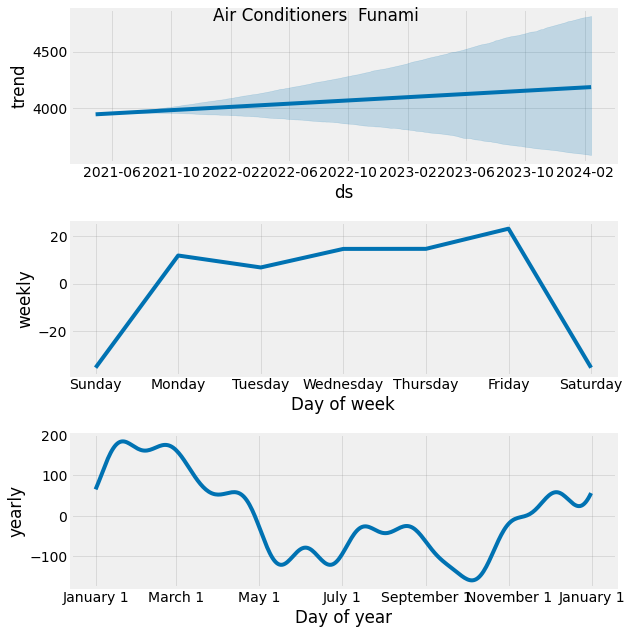

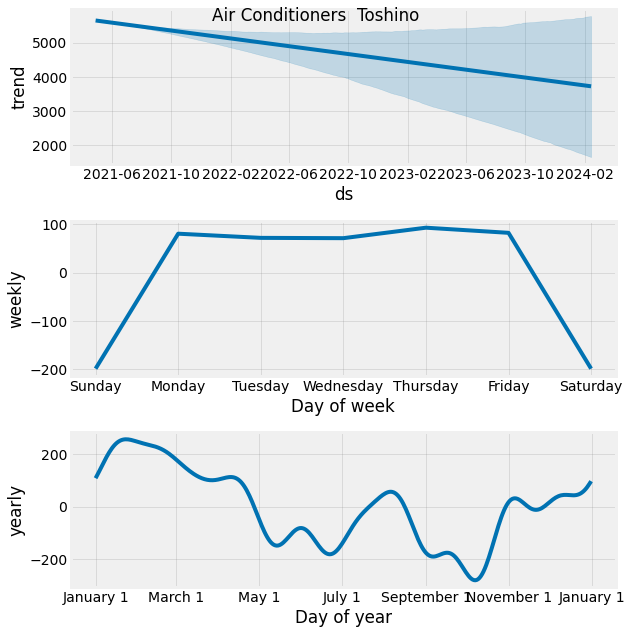

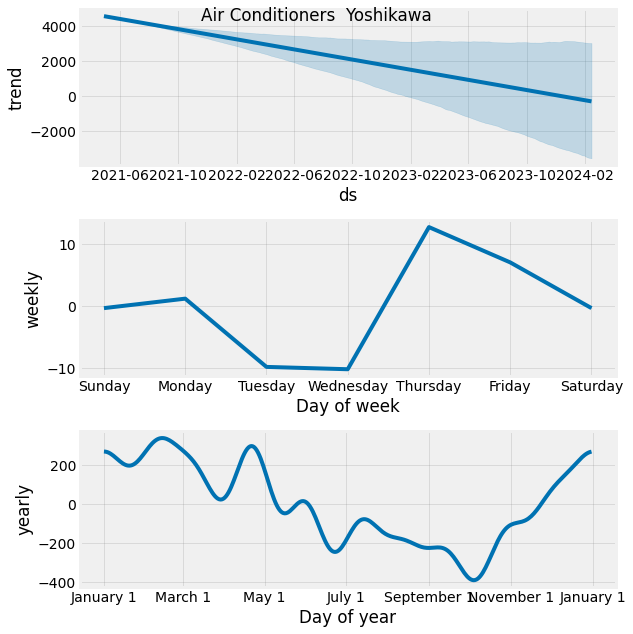

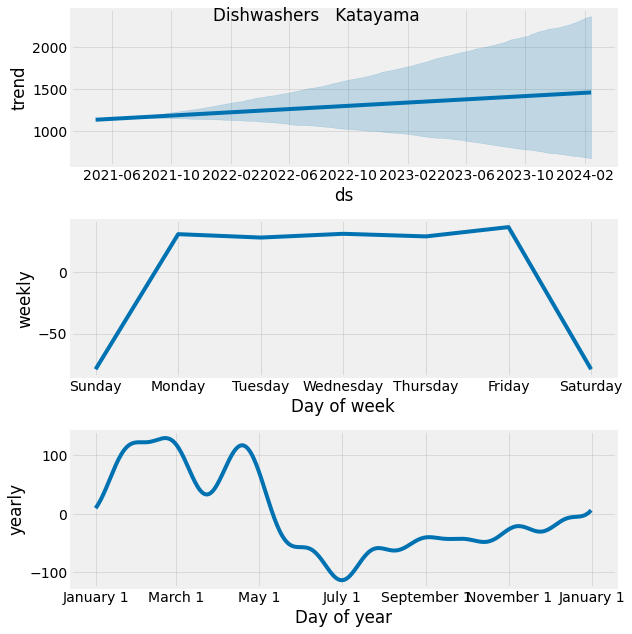

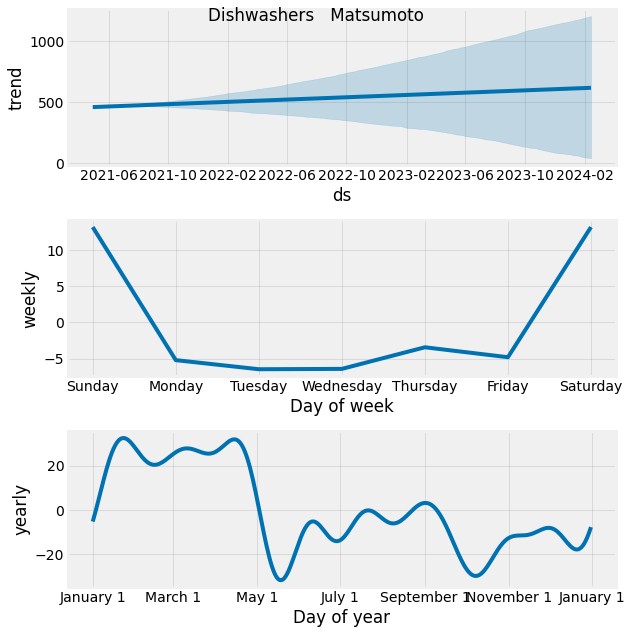

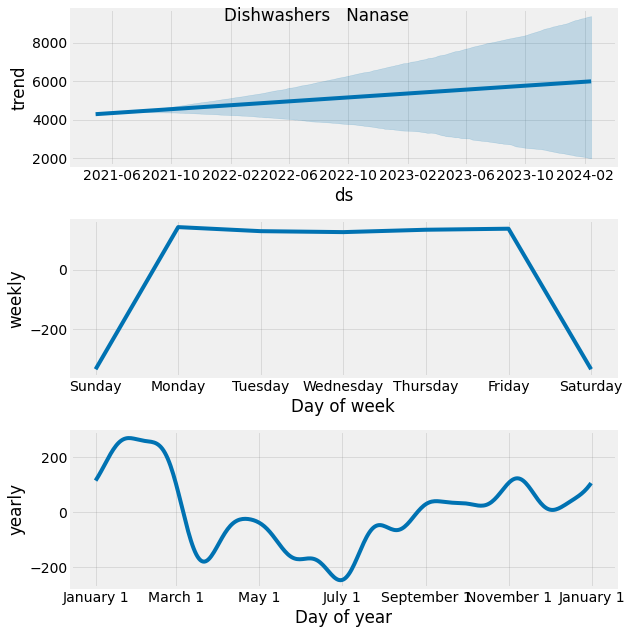

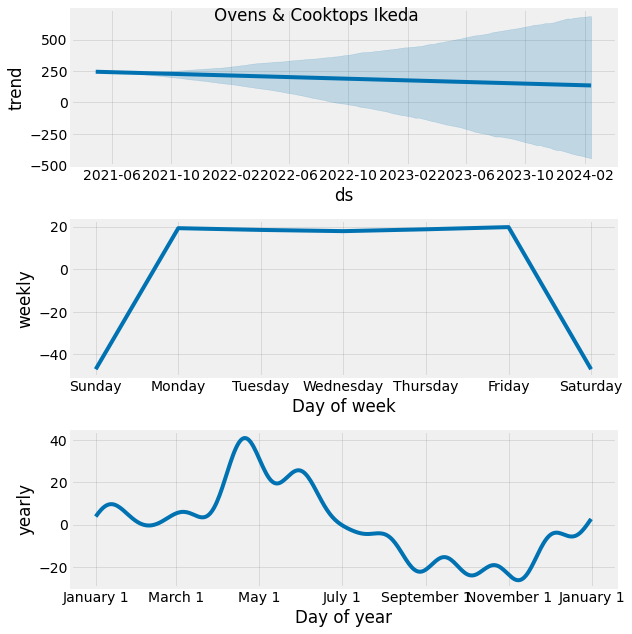

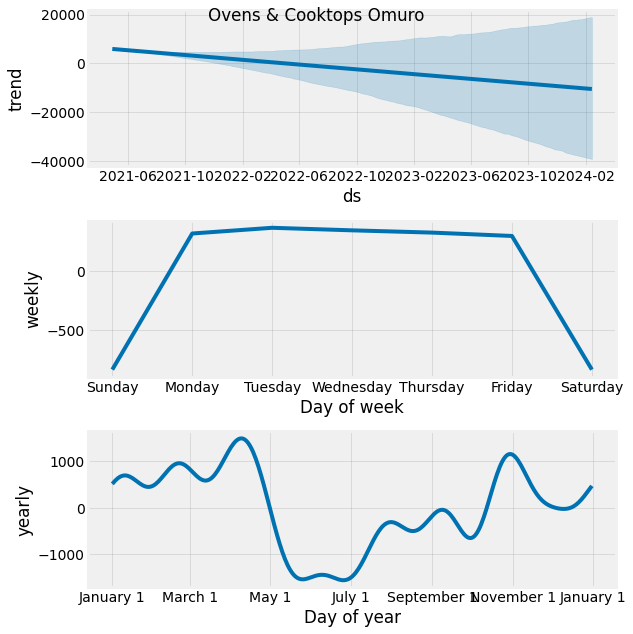

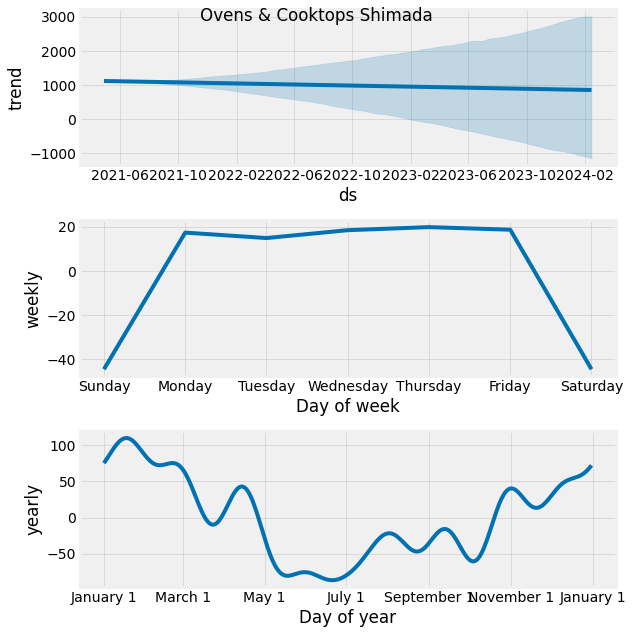

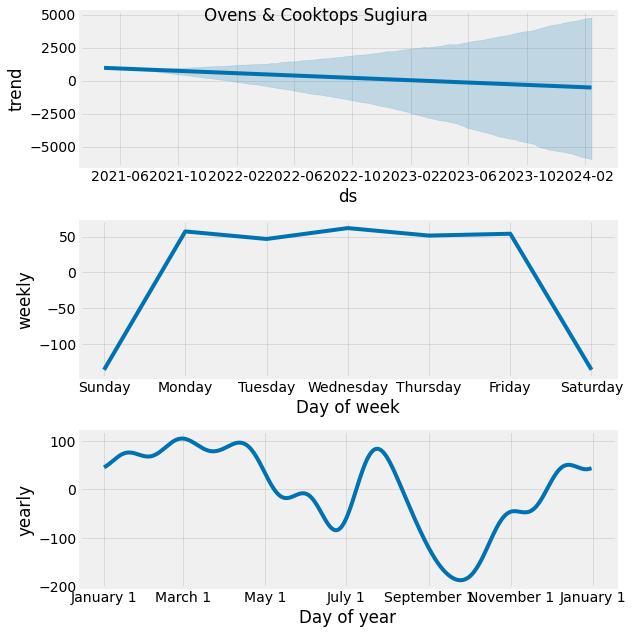

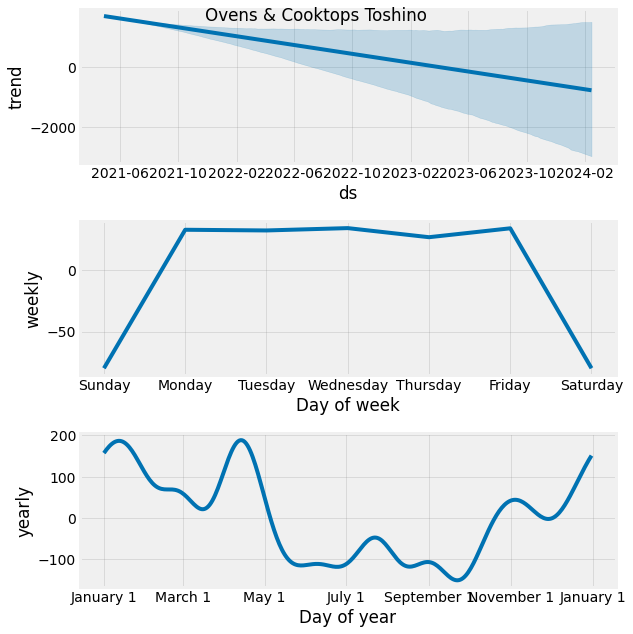

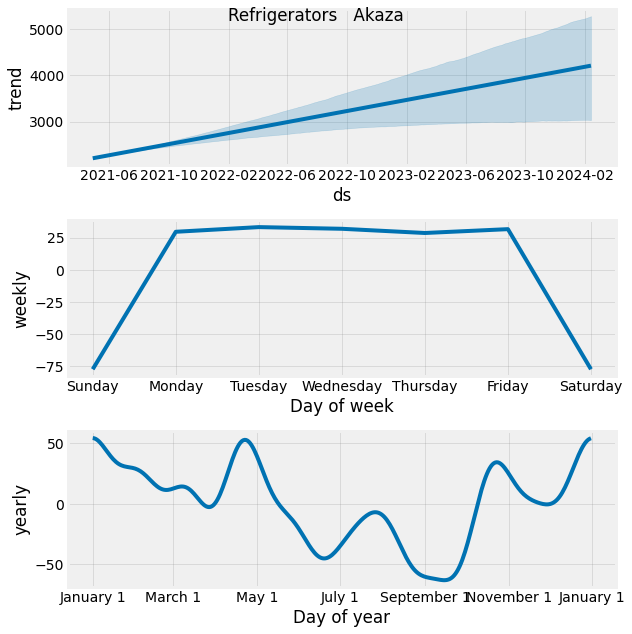

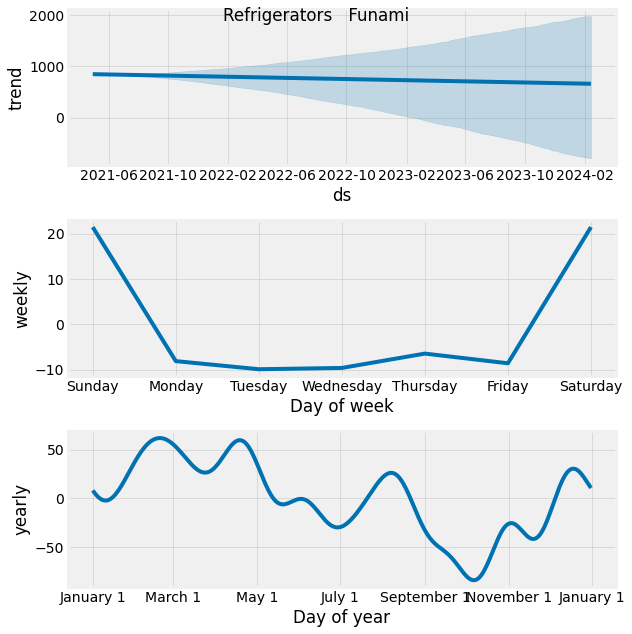

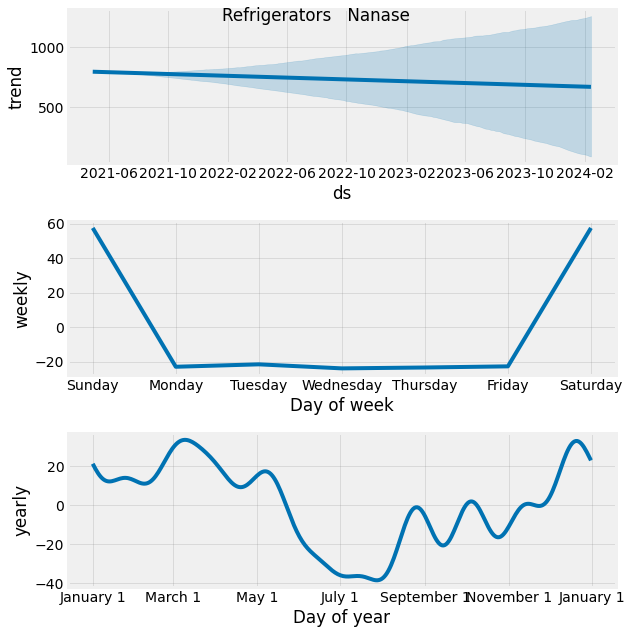

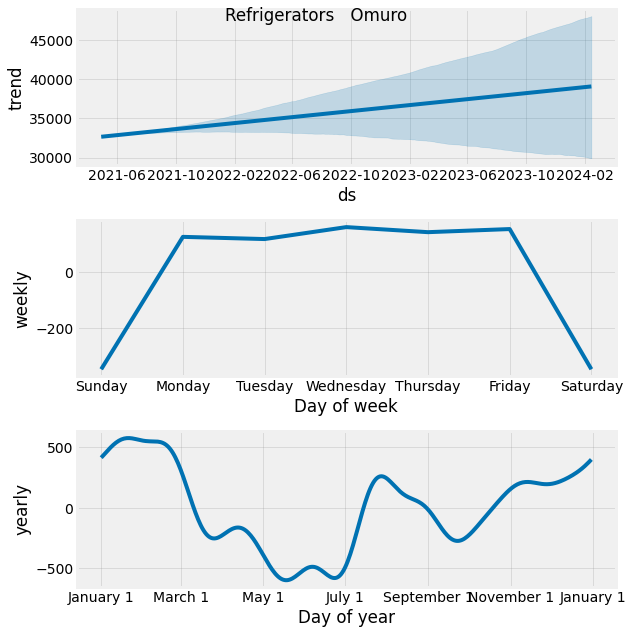

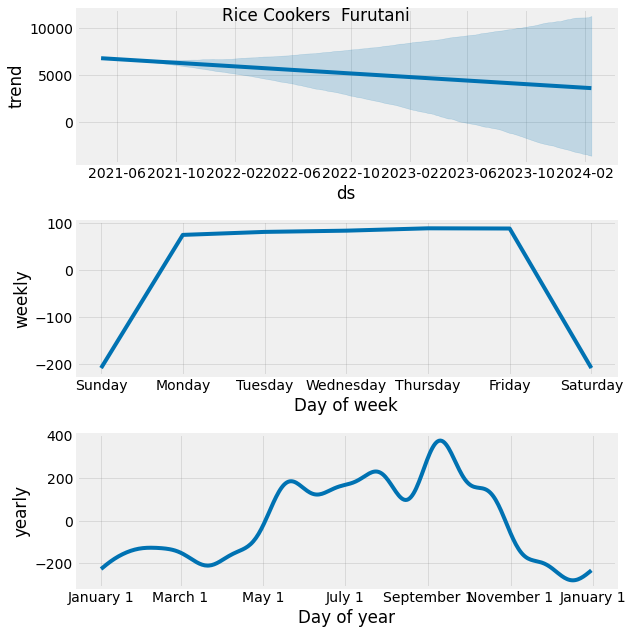

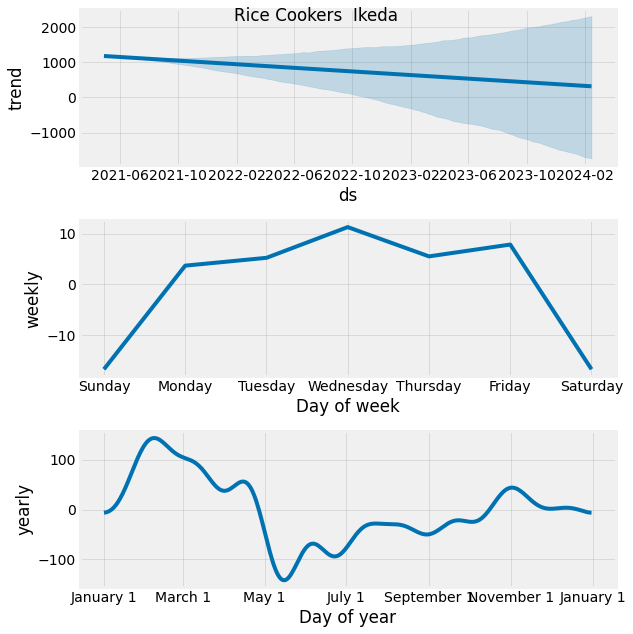

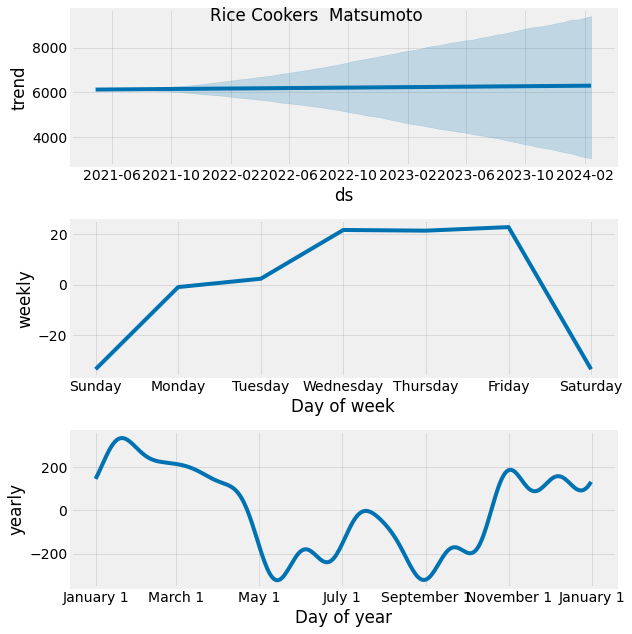

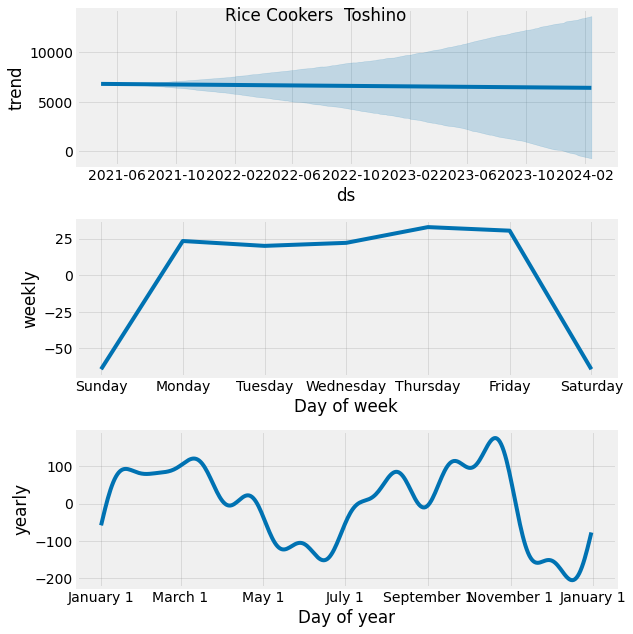

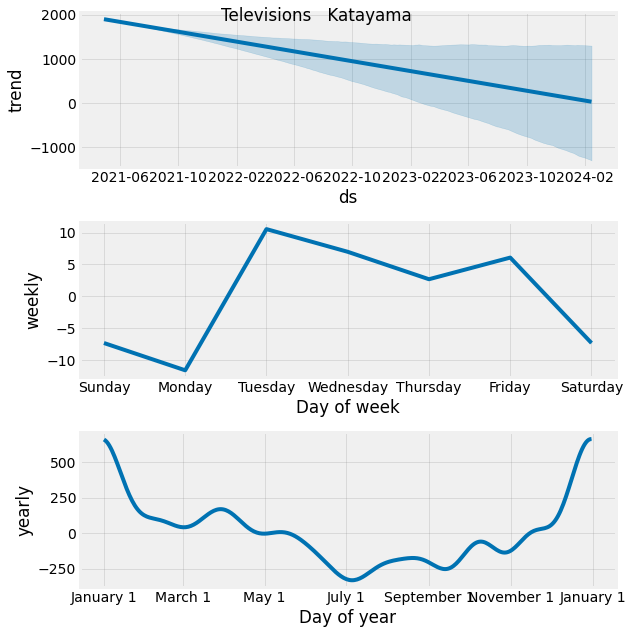

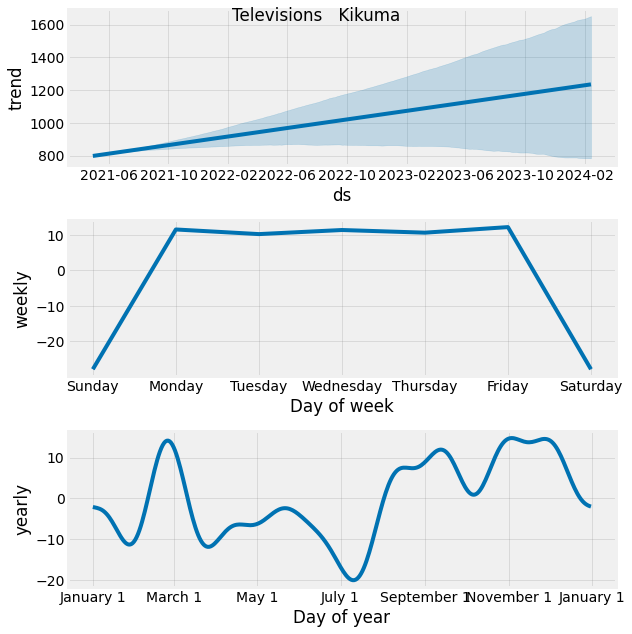

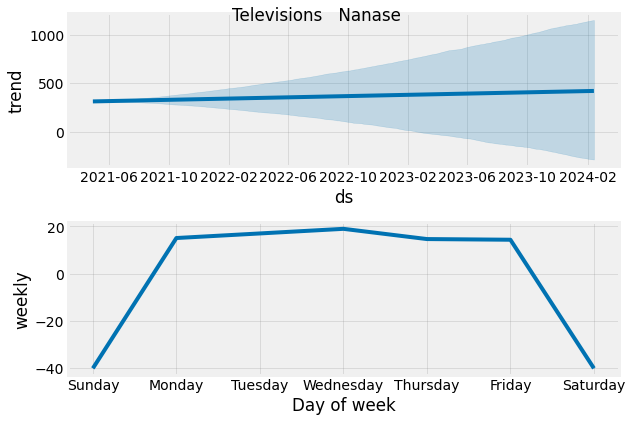

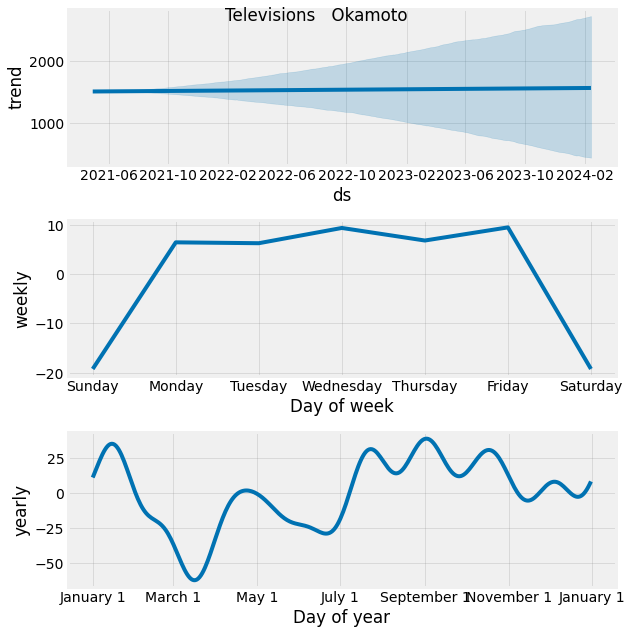

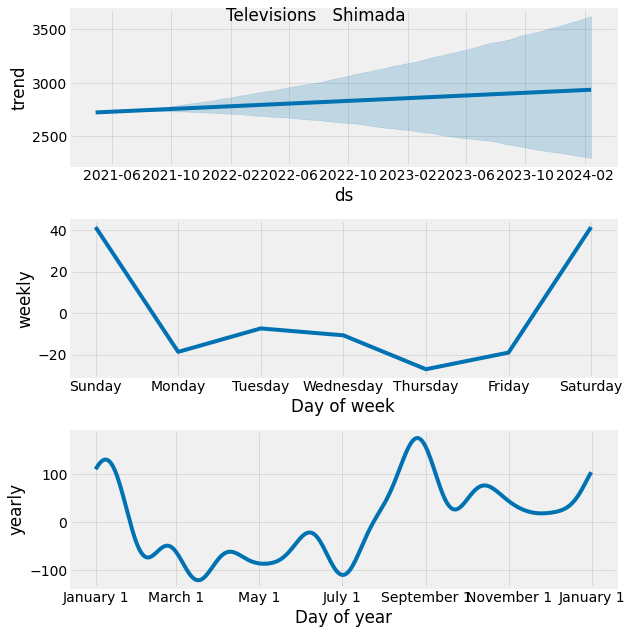

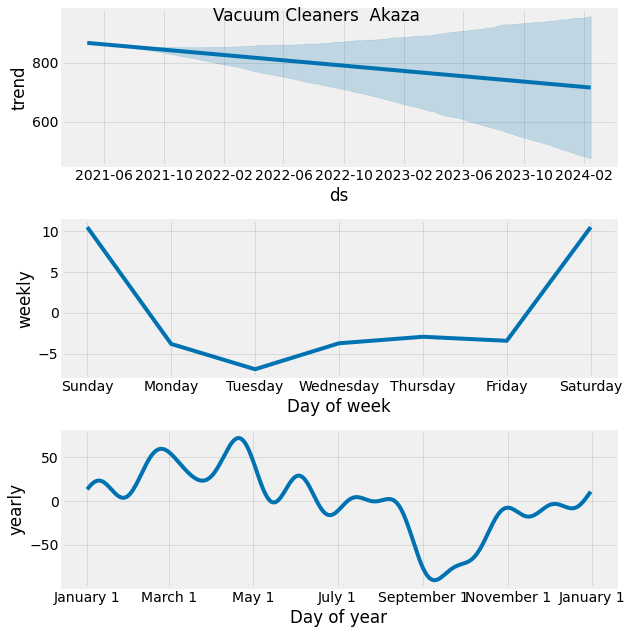

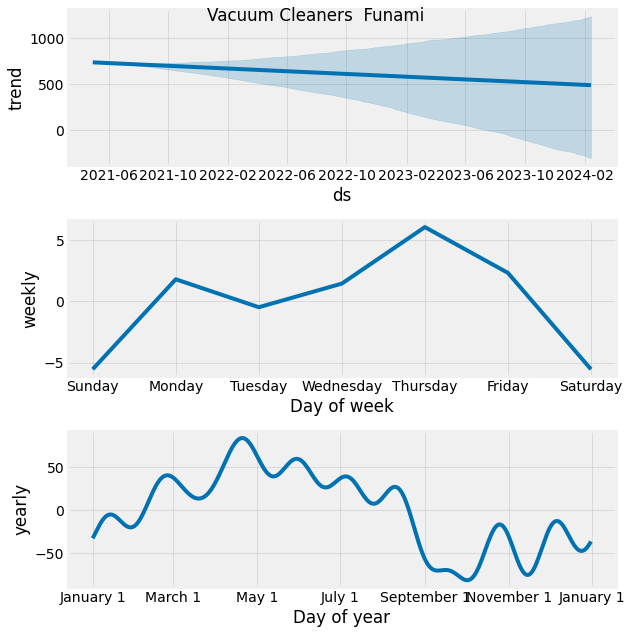

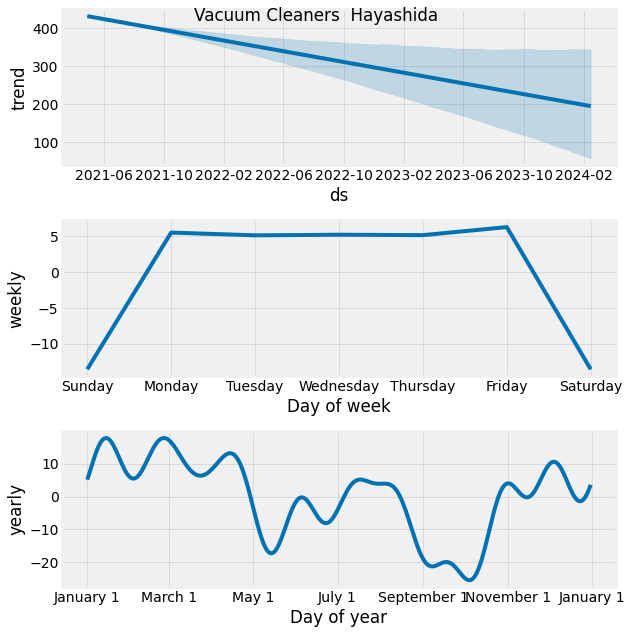

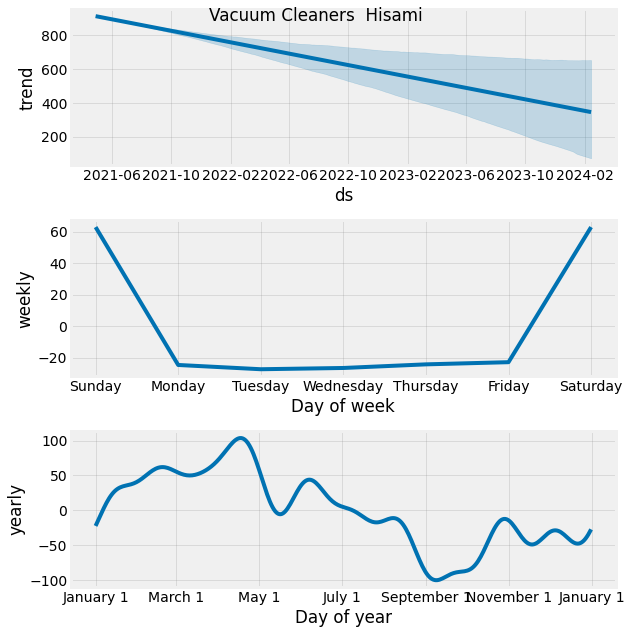

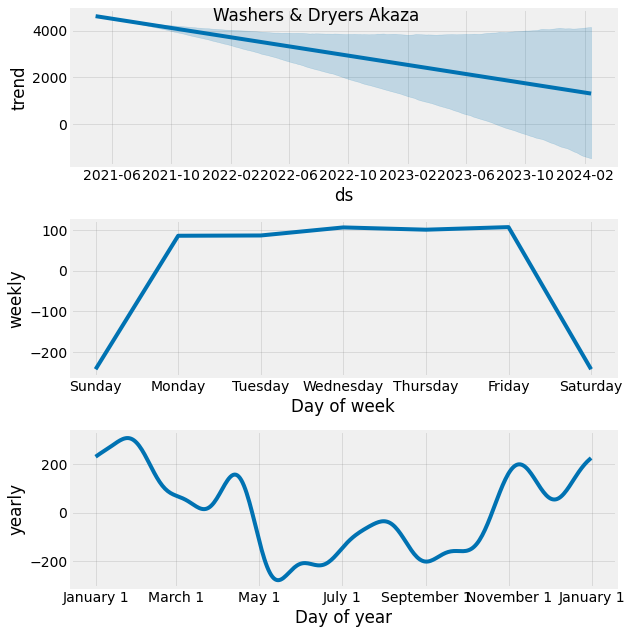

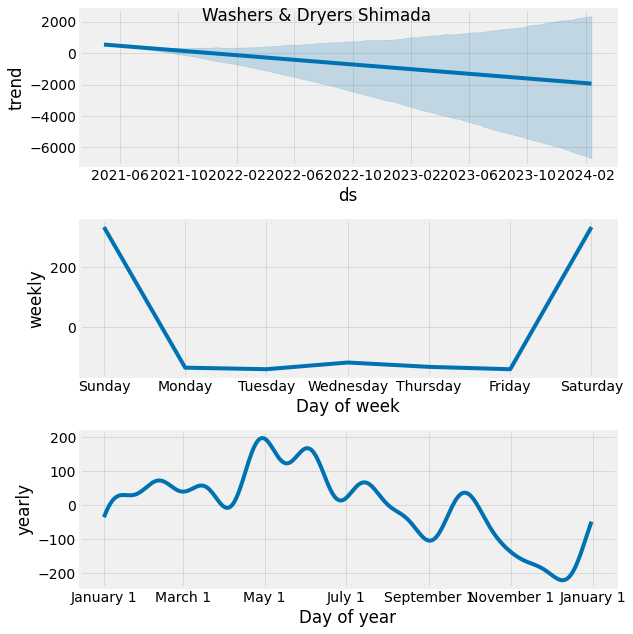

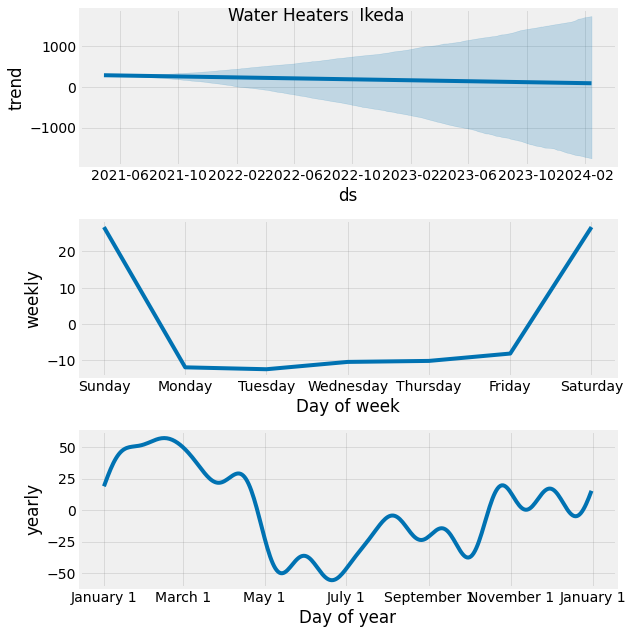

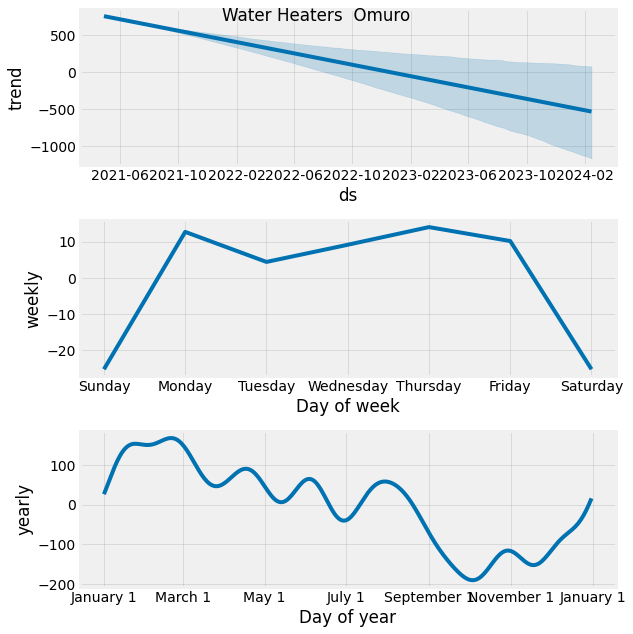

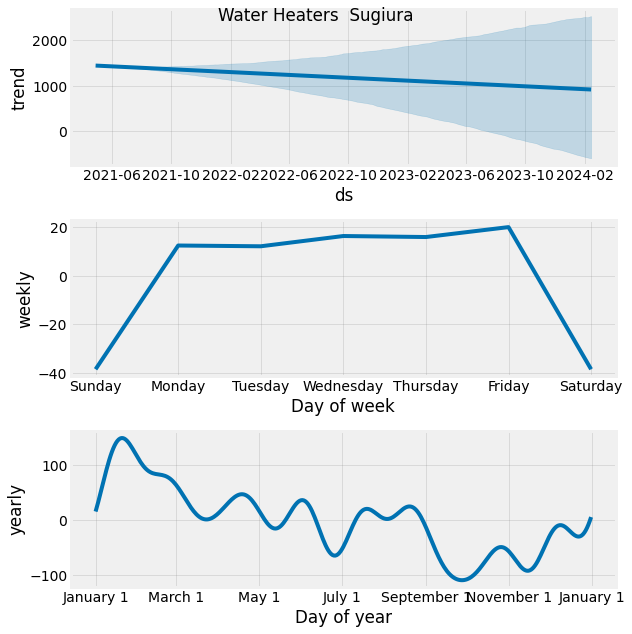

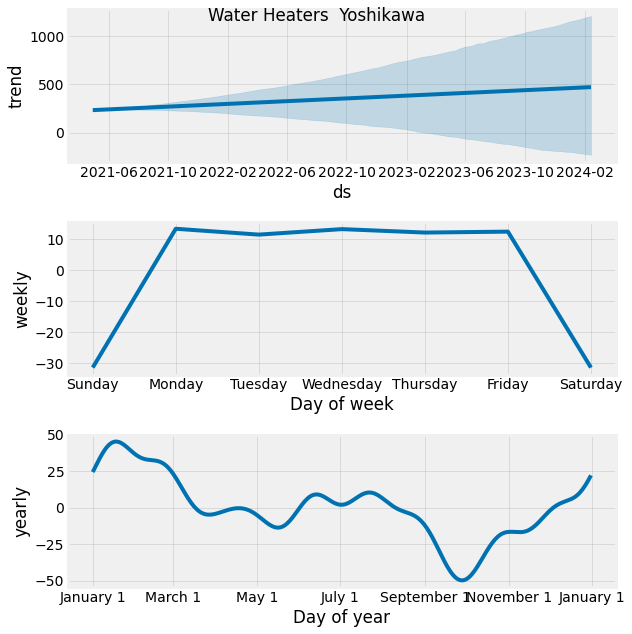

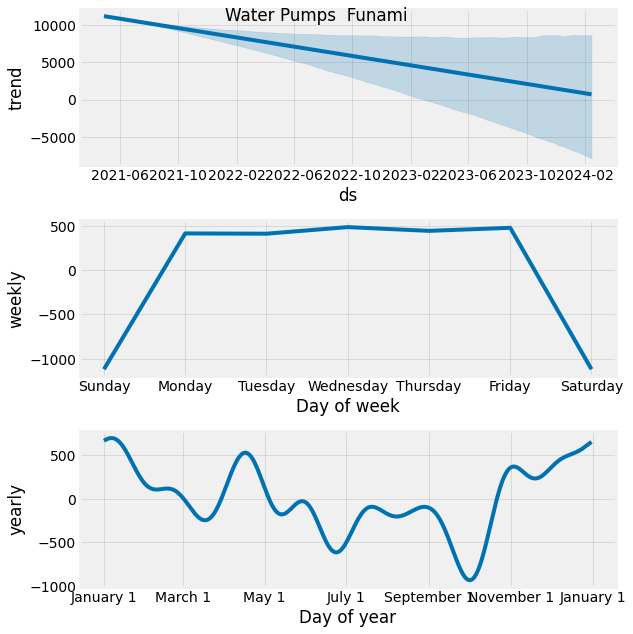

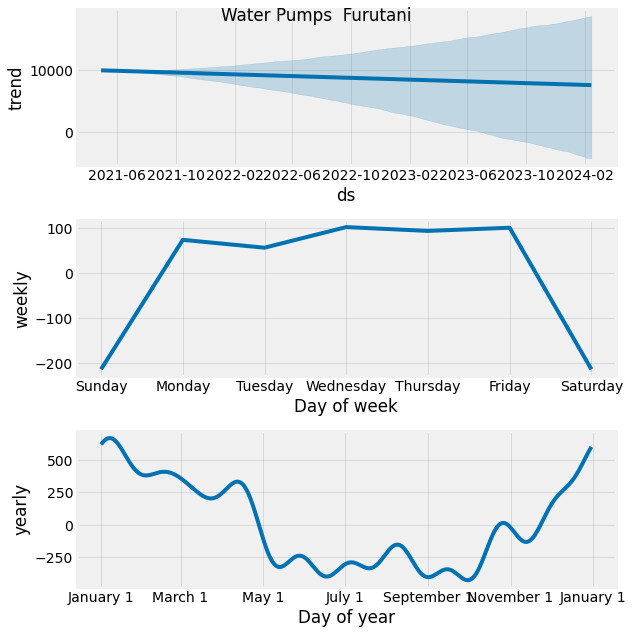

In [91]:
# Plot the components of the model
rows = 36
columns = 1

for idx,names in enumerate(names_category):
    number = idx + 1
    fig.add_subplot(rows, columns, number)
    globals()['fig%s' % number] = globals()['model%s' % number+'_final'].plot_components(
        globals()['sales%s' % number+'_test_fcst_final'])
    globals()['plot%s' % number] = plt.suptitle(names)
    
plt.show()

In [92]:
sales1_test_fcst_final['yhat'][0]

3947.1171257493306

In [93]:
for idx,names in enumerate(names_category):
    number = idx + 1
    print(globals()['sales%s' % number].groupby(globals()['sales%s' % number].ds.dt.year).y.sum().to_frame())

              y
ds             
2010   195709.0
2011   288731.0
2012   317879.0
2013   380563.0
2014   476654.0
2015   534007.0
2016   545576.0
2017   695447.0
2018   855284.0
2019  1001325.0
2020   813977.0
2021   362360.0
              y
ds             
2010   587601.0
2011   802691.0
2012   888611.0
2013  1007691.0
2014  1155392.0
2015  1169309.0
2016  1196681.0
2017  1558640.0
2018  1777385.0
2019  1788551.0
2020  1355010.0
2021   515241.0
              y
ds             
2010   372139.0
2011   430123.0
2012   446753.0
2013   849706.0
2014  1200948.0
2015  1323453.0
2016  1217699.0
2017  1721430.0
2018  2052693.0
2019  2064792.0
2020  1225979.0
2021   443731.0
             y
ds            
2010  348563.0
2011  371173.0
2012  252182.0
2013  231129.0
2014  290857.0
2015  185571.0
2016  191321.0
2017  218683.0
2018  218529.0
2019  270120.0
2020  168104.0
2021  139616.0
             y
ds            
2010   35473.0
2011  226135.0
2012  170717.0
2013  123471.0
2014  107522.0
2015   82688.

In [94]:
sales36.groupby(sales36.ds.dt.year).y.sum().to_frame().iloc[-1,0]

890923.0

In [95]:
temp_total_sales_2021 = 0.0
for idx,names in enumerate(names_category):
    number = idx +1
    temp_total_sales_2021 += globals()['sales%s' % number].groupby(globals()['sales%s' % number].ds.dt.year).y.sum().to_frame().iloc[-1,0]

In [96]:
print(temp_total_sales_2021)
print(temp_total_sales_2021 > 30000000)

11849286.0
False


In [97]:
pred_total_sales_30m = temp_total_sales_2021
for i in range(360):
    for idx,names in enumerate(names_category):
        number = idx+1
        pred_total_sales_30m += globals()['sales%s' % number+'_test_fcst_final']['yhat'][i]
    
    if pred_total_sales_30m >= 30000000:
        print(pred_total_sales_30m)
        print(i)
        break  

30050251.34475037
149


In [98]:
df1_test.iloc[149]

ds   2021-11-24
Name: 149, dtype: datetime64[ns]

In [99]:
sales1_test_fcst_final.groupby(sales1_test_fcst_final.ds.dt.year).yhat.sum().to_frame()

yhat
ds                
2021  6.956292e+05
2022  1.054940e+06
2023  1.077412e+06
2024  1.433340e+05

In [100]:
for idx,names in enumerate(names_category):
    number = idx + 1
    print(globals()['sales%s' % number+'_test_fcst_final'].groupby(globals()['sales%s' % number+'_test_fcst_final'].ds.dt.year).yhat.sum().to_frame())

              yhat
ds                
2021  6.956292e+05
2022  1.054940e+06
2023  1.077412e+06
2024  1.433340e+05
              yhat
ds                
2021  9.592060e+05
2022  1.278558e+06
2023  1.099613e+06
2024  1.339405e+05
               yhat
ds                 
2021  688355.843916
2022  656630.371742
2023  203317.198093
2024    1775.494953
               yhat
ds                 
2021  205803.757129
2022  338811.659702
2023  369094.073095
2024   51894.547601
               yhat
ds                 
2021   81275.559190
2022  134745.966799
2023  149411.830327
2024   20694.595340
              yhat
ds                
2021  8.122629e+05
2022  1.334997e+06
2023  1.493097e+06
2024  2.082744e+05
              yhat
ds                
2021  43260.925820
2022  56403.709312
2023  46291.462986
2024   5301.220856
              yhat
ds                
2021  6.903472e+05
2022 -1.621672e+05
2023 -1.681905e+06
2024 -3.023780e+05
               yhat
ds                 
2021  190124.653579
2022  2652

In [101]:
sales36_test_fcst_final.groupby(sales36_test_fcst_final.ds.dt.year).yhat.sum().to_frame().iloc[0,0]

1692802.6920754549

In [102]:
temp_total_sales_2021

11849286.0

In [103]:
total_pred_sales_2021 = 0.0
for idx,names in enumerate(names_category):
    number = idx + 1
    total_pred_sales_2021 += globals()['sales%s' % number +'_test_fcst_final'].groupby(globals()['sales%s' % number +'_test_fcst_final'].ds.dt.year).yhat.sum().to_frame().iloc[0,0]

In [104]:
total_pred_sales_2021

21436151.487619653

In [105]:
all_total_sales_2021 = total_pred_sales_2021 + temp_total_sales_2021

In [106]:
all_total_sales_2021

33285437.487619653